In [5]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
# import gym
import d4rl
import gym


No module named 'flow'
/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/glfw/__init__.py:917: GLFWError: (65550) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
No module named 'carla'
pybullet build time: Jan 29 2025 23:19:57


In [6]:
import gym
import d4rl
import pickle
import os

In [7]:
def plot_features(data_noisy, data, title = '', label1='', label2=''):
    #plot histograms of all features in data
    num_features = data.shape[1]
    num_rows = int(np.ceil(num_features / 3))
    fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 3))
    axs = axs.flatten()
    for i in range(num_features):
        # axs[i].hist(data_noisy[:, i], bins=100, alpha=0.7, color='orange', label ="noisy")
        # axs[i].hist(data[:, i], bins=100, alpha=0.7, color='blue', label = "no noise")
        
        axs[i].hist(data_noisy[:, i], bins=100, alpha=0.7, color='orange', label =label1)
        axs[i].hist(data[:, i], bins=100, alpha=0.7, color='blue', label = label2)
        
        axs[i].set_title(f'Feature {i}')
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
        axs[i].legend()
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

## multiplied noise 0.001

In [8]:
import os

# env = gym.make("Hopper-v2")
offline_env = gym.make('hopper-expert-v2')
data = d4rl.qlearning_dataset(offline_env)
# noisy_env = RandomNormalNoisyActions(env=env, noise_rate=0.01, loc = 0.0, scale = 0.001)
#load data




/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/spaces/box.py:78: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile:   0%|          | 0/21 [00:00<?, ?it/s]

load datafile: 100%|██████████| 21/21 [00:01<00:00, 17.12it/s]


In [10]:
logdir = os.path.join('/abiomed/intermediate_data_d4rl', 'sac_expert', f"Hopper-v2_action_noisy.pkl") 
with open(logdir, 'rb') as f:
    data_noisy_mul = pickle.load(f)

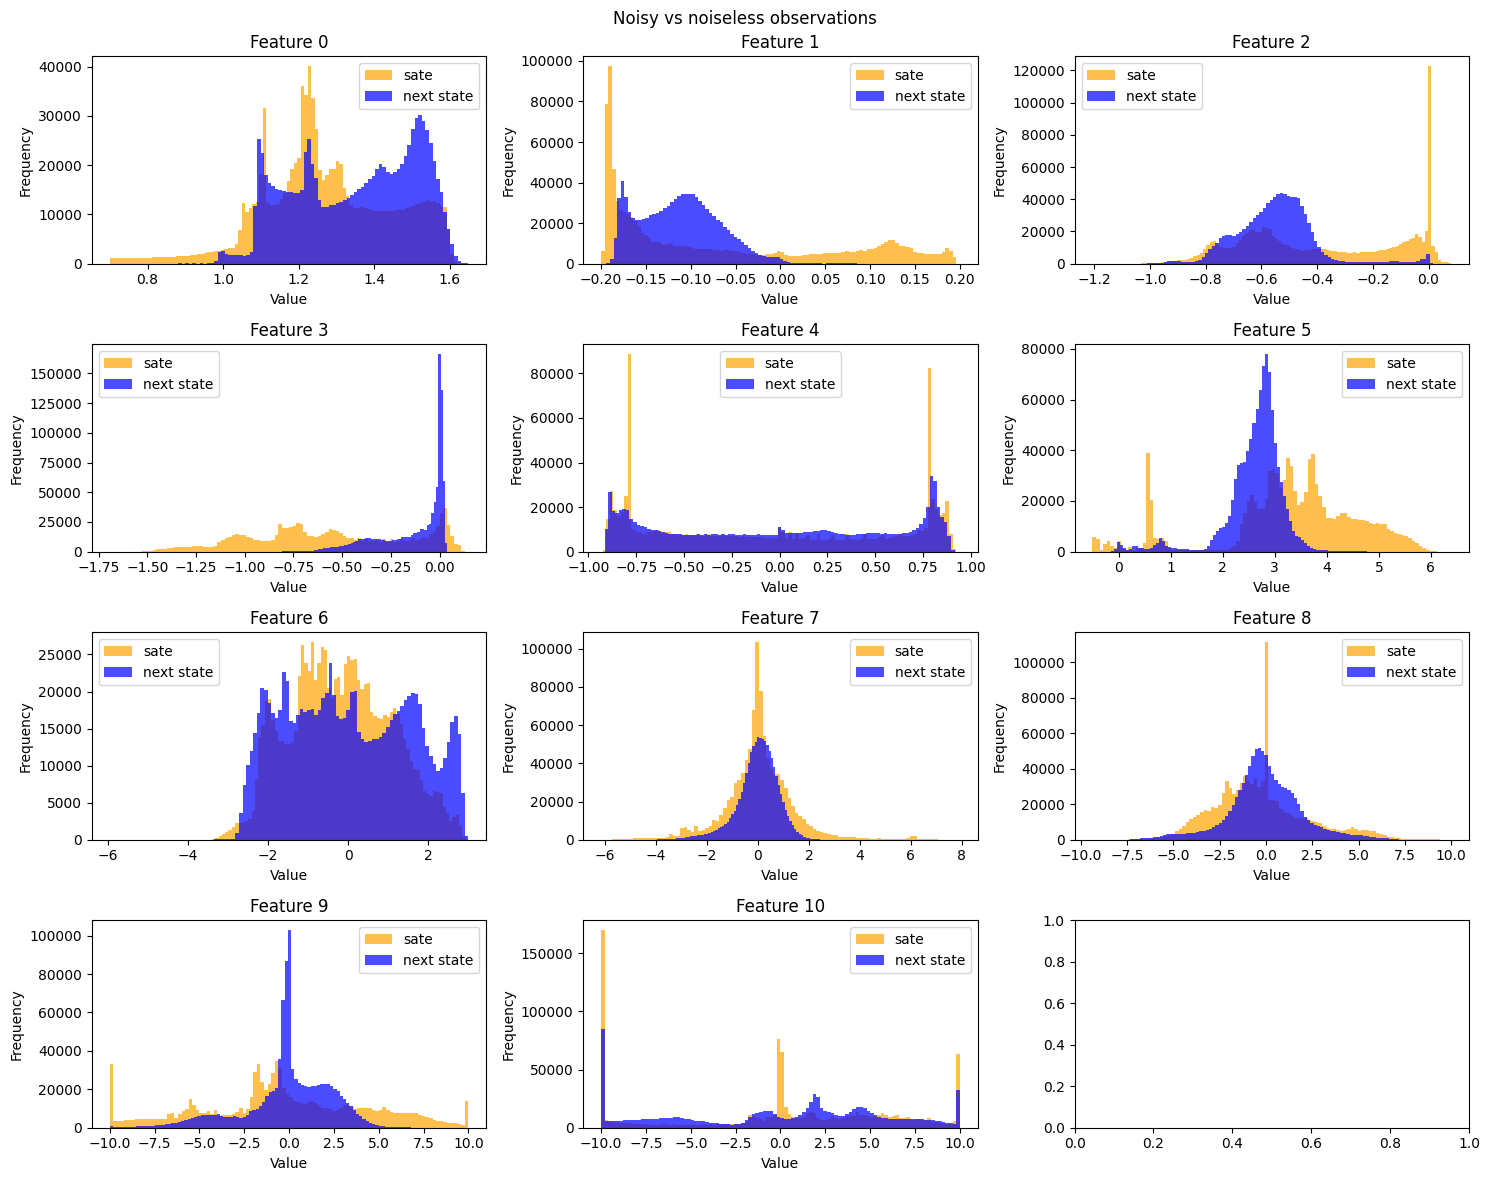

In [8]:
plot_features(data_noisy_mul['observation'], data['observations'], title = 'Noisy vs noiseless observations')

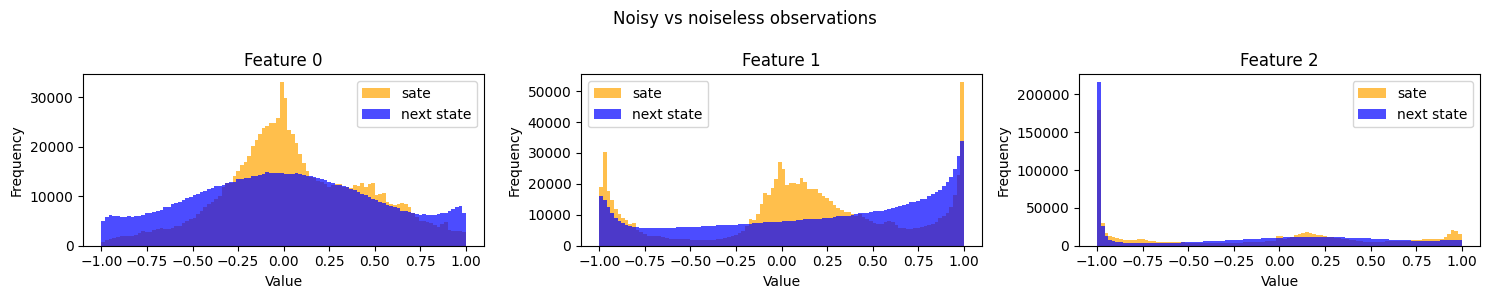

In [9]:
plot_features(data_noisy_mul['action'], data['actions'], title = 'Noisy vs noiseless observations')

## added 0.001 noise

In [11]:
logdir = os.path.join('/abiomed/intermediate_data_d4rl', 'sac_expert', f"Hopper-v2_action_noisy_added.pkl") 
with open(logdir, 'rb') as f:
    data_noisy_add_0001 = pickle.load(f)

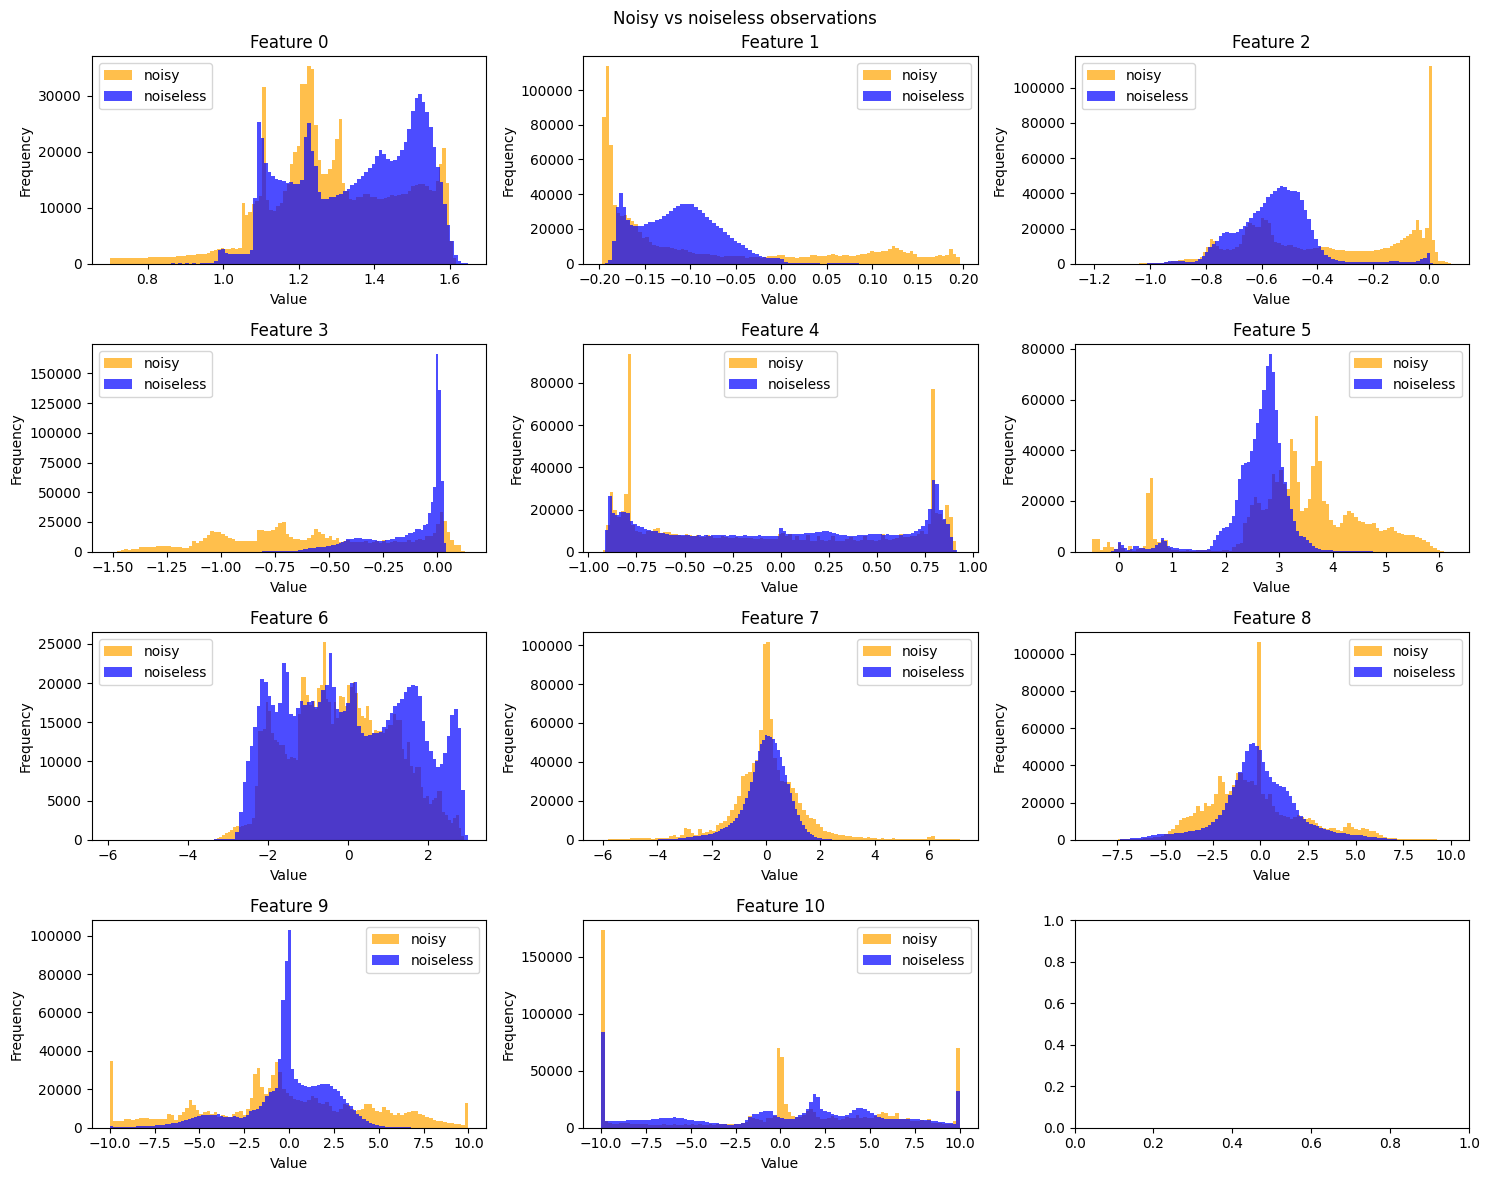

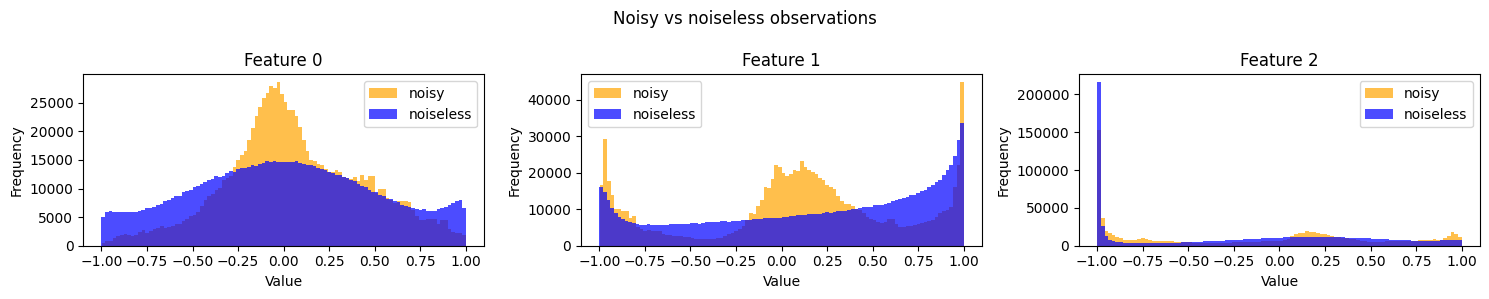

In [7]:
plot_features(data_noisy_add_0001['observation'], data['observations'], title = 'Noisy vs noiseless observations')
plot_features(data_noisy_add_0001['action'], data['actions'], title = 'Noisy vs noiseless observations')

## added noise 0.0005

In [12]:
offline_env = gym.make('hopper-expert-v2')
data = d4rl.qlearning_dataset(offline_env)
# noisy_env = RandomNormalNoisyActions(env=env, noise_rate=0.01, loc = 0.0, scale = 0.001)
#load data
logdir = os.path.join('/abiomed/intermediate_data_d4rl', 'sac_expert', f"Hopper-v2_action_noisy_added_0.0005.pkl") 
with open(logdir, 'rb') as f:
    data_noisy_added_00005 = pickle.load(f)

/home/ubuntu/miniconda3/envs/mopo/lib/python3.8/site-packages/gym/spaces/box.py:78: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile:  10%|▉         | 2/21 [00:00<00:01, 18.79it/s]

load datafile: 100%|██████████| 21/21 [00:01<00:00, 17.38it/s]


## added no noise

In [3]:

# noisy_env = RandomNormalNoisyActions(env=env, noise_rate=0.01, loc = 0.0, scale = 0.001)
#load data
logdir = os.path.join('/abiomed/intermediate_data_d4rl', 'sac_expert', f"Hopper-v2_action_noisy_added_0.001_0.0.pkl") 
with open(logdir, 'rb') as f:
    data_no_noisy = pickle.load(f)

In [4]:
logdir

'/abiomed/intermediate_data_d4rl/sac_expert/Hopper-v2_action_noisy_added_0.001_0.0.pkl'

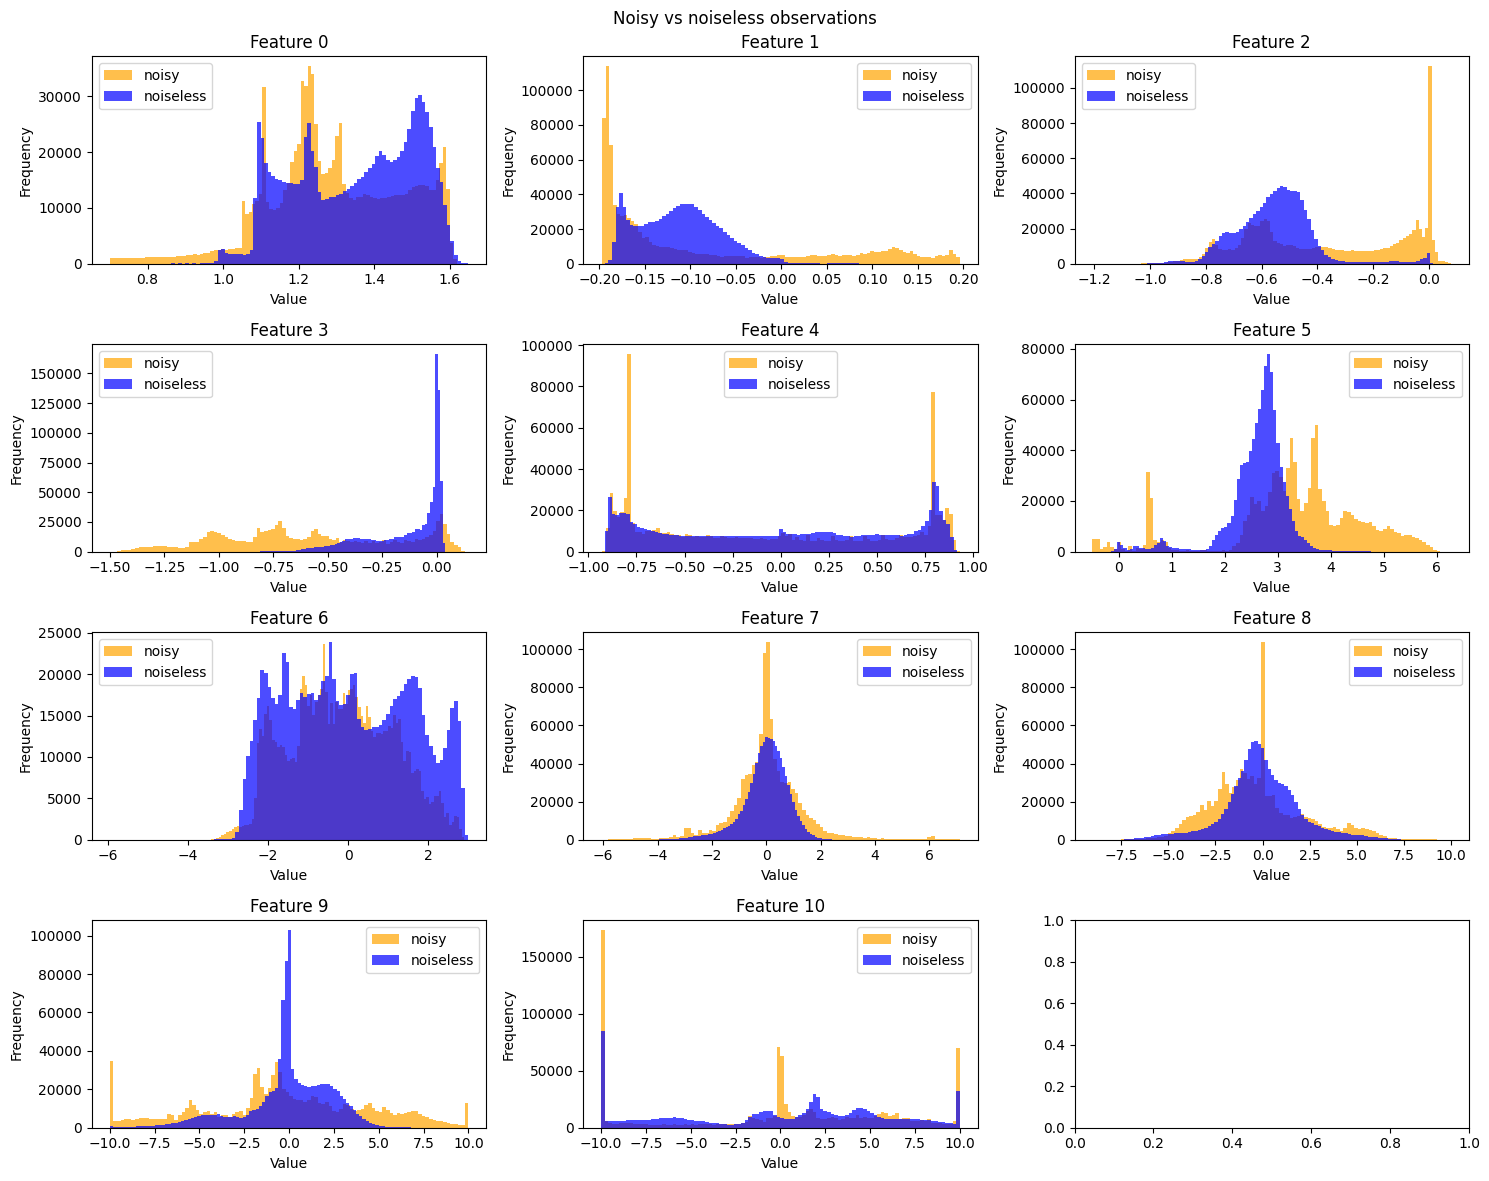

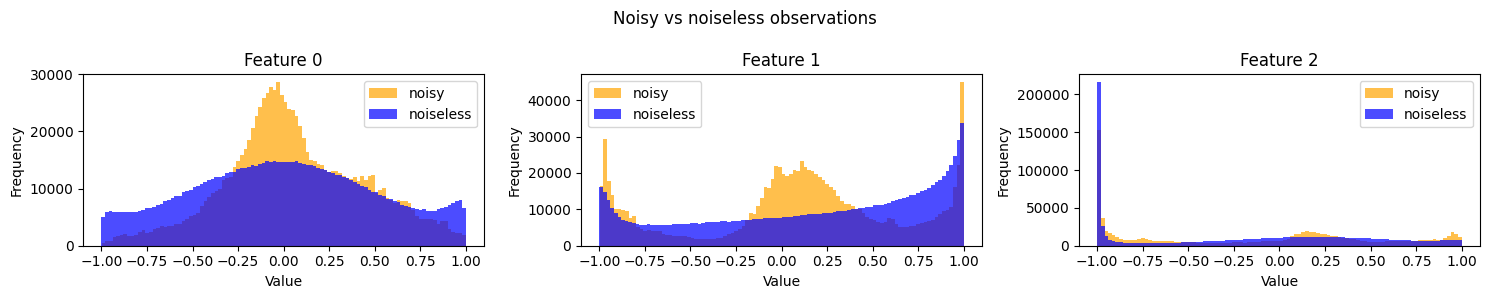

In [8]:
plot_features(data_no_noisy['observation'], data['observations'], title = 'Noisy vs noiseless observations')
plot_features(data_no_noisy['action'], data['actions'], title = 'Noisy vs noiseless observations')

In [5]:
data_no_noisy['observations'] = data_no_noisy['observation']
data_no_noisy['actions'] = data_no_noisy['action']
data_no_noisy['next_observations'] = data_no_noisy['next_observation']
data_no_noisy['rewards'] = data_no_noisy['reward']
data_no_noisy['terminals'] = data_no_noisy['terminal']

#save
logdir = "/abiomed/intermediate_data_d4rl/sac_expert/Hopper-v2_action_noisy_added_0.001_0.0.pkl"
with open(logdir, 'wb') as f:
    pickle.dump(data_no_noisy, f)



##  our expert vs 0.0005 added noise

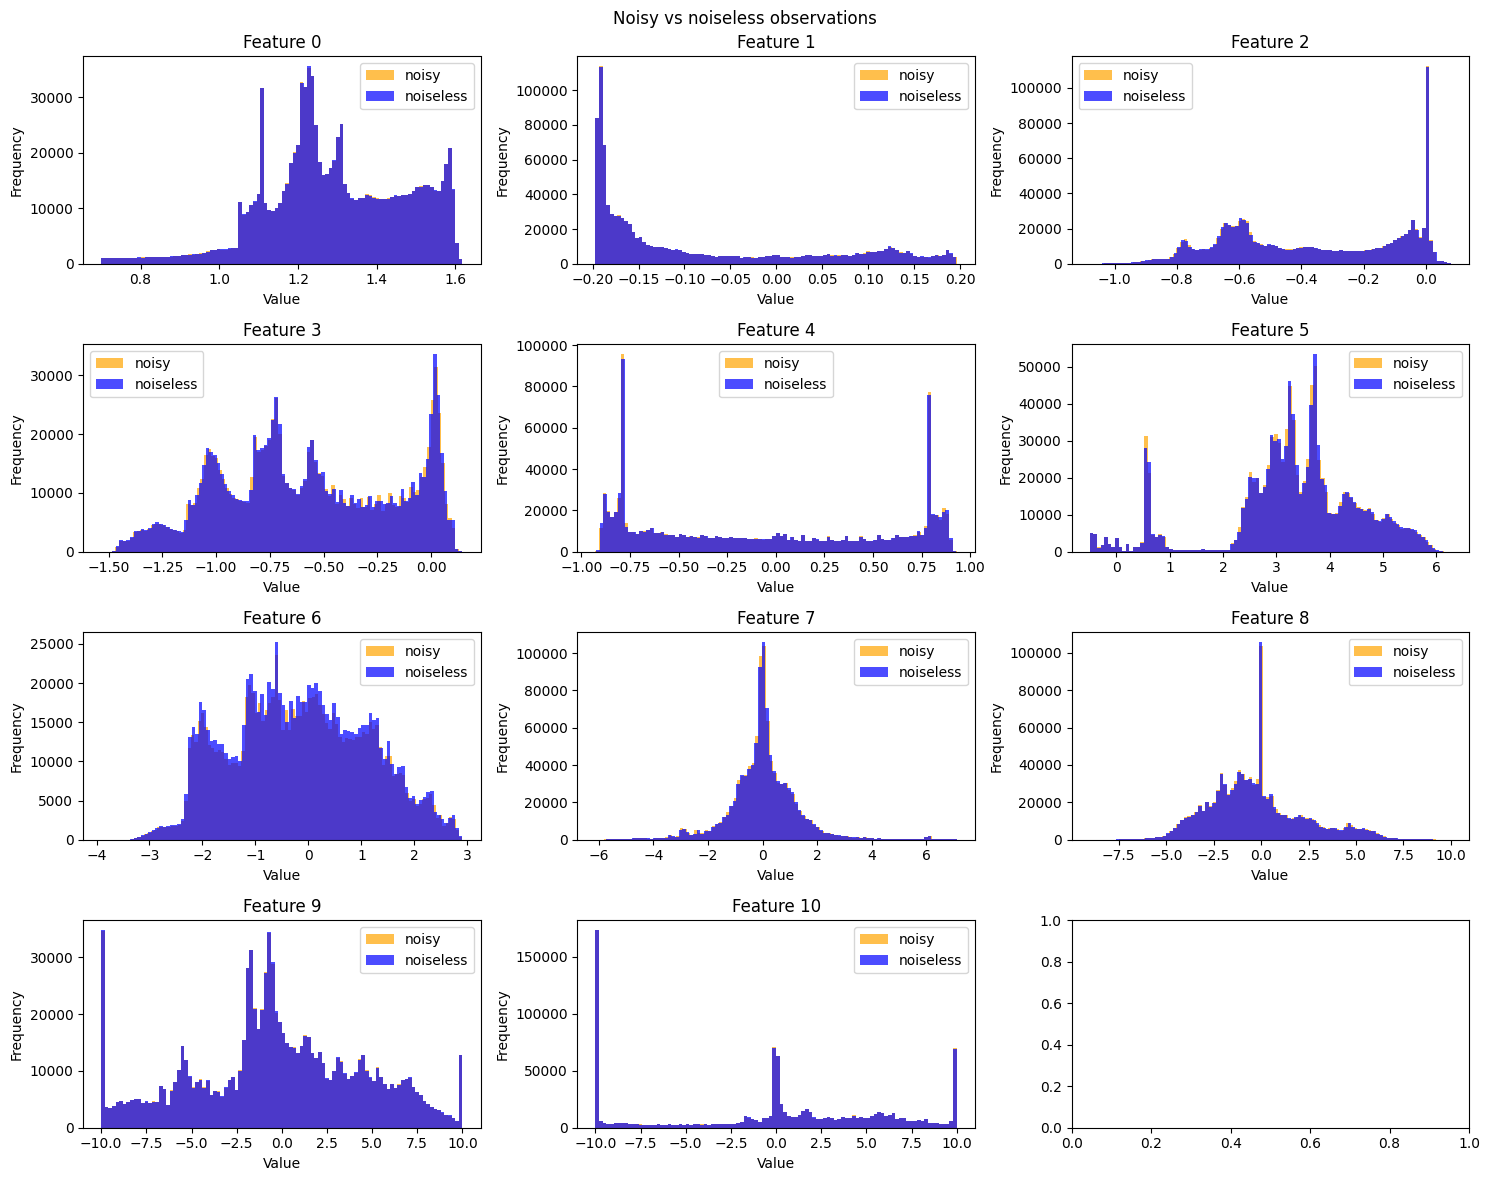

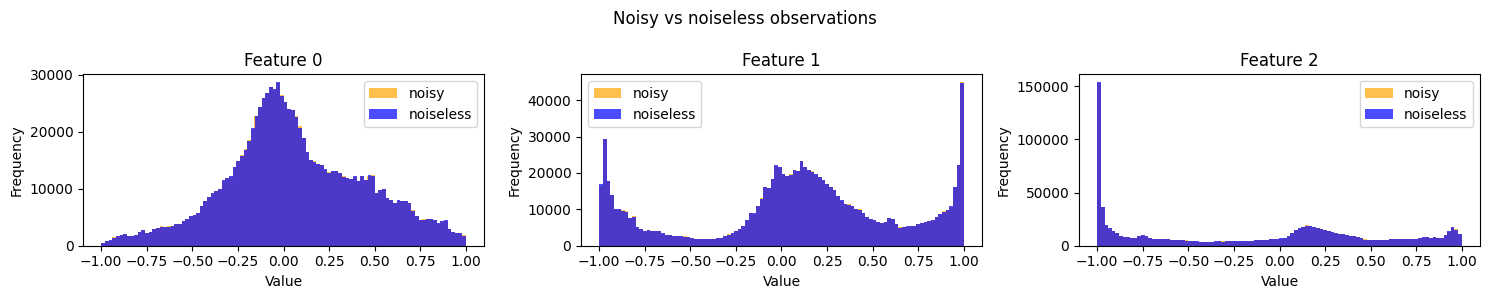

In [15]:
plot_features(data_no_noisy['observation'], data_noisy_added_00005['observation'], title = 'Noisy vs noiseless observations')
plot_features(data_no_noisy['action'], data_noisy_added_00005['action'], title = 'Noisy vs noiseless observations')

## our expert vs 0.001 noise added

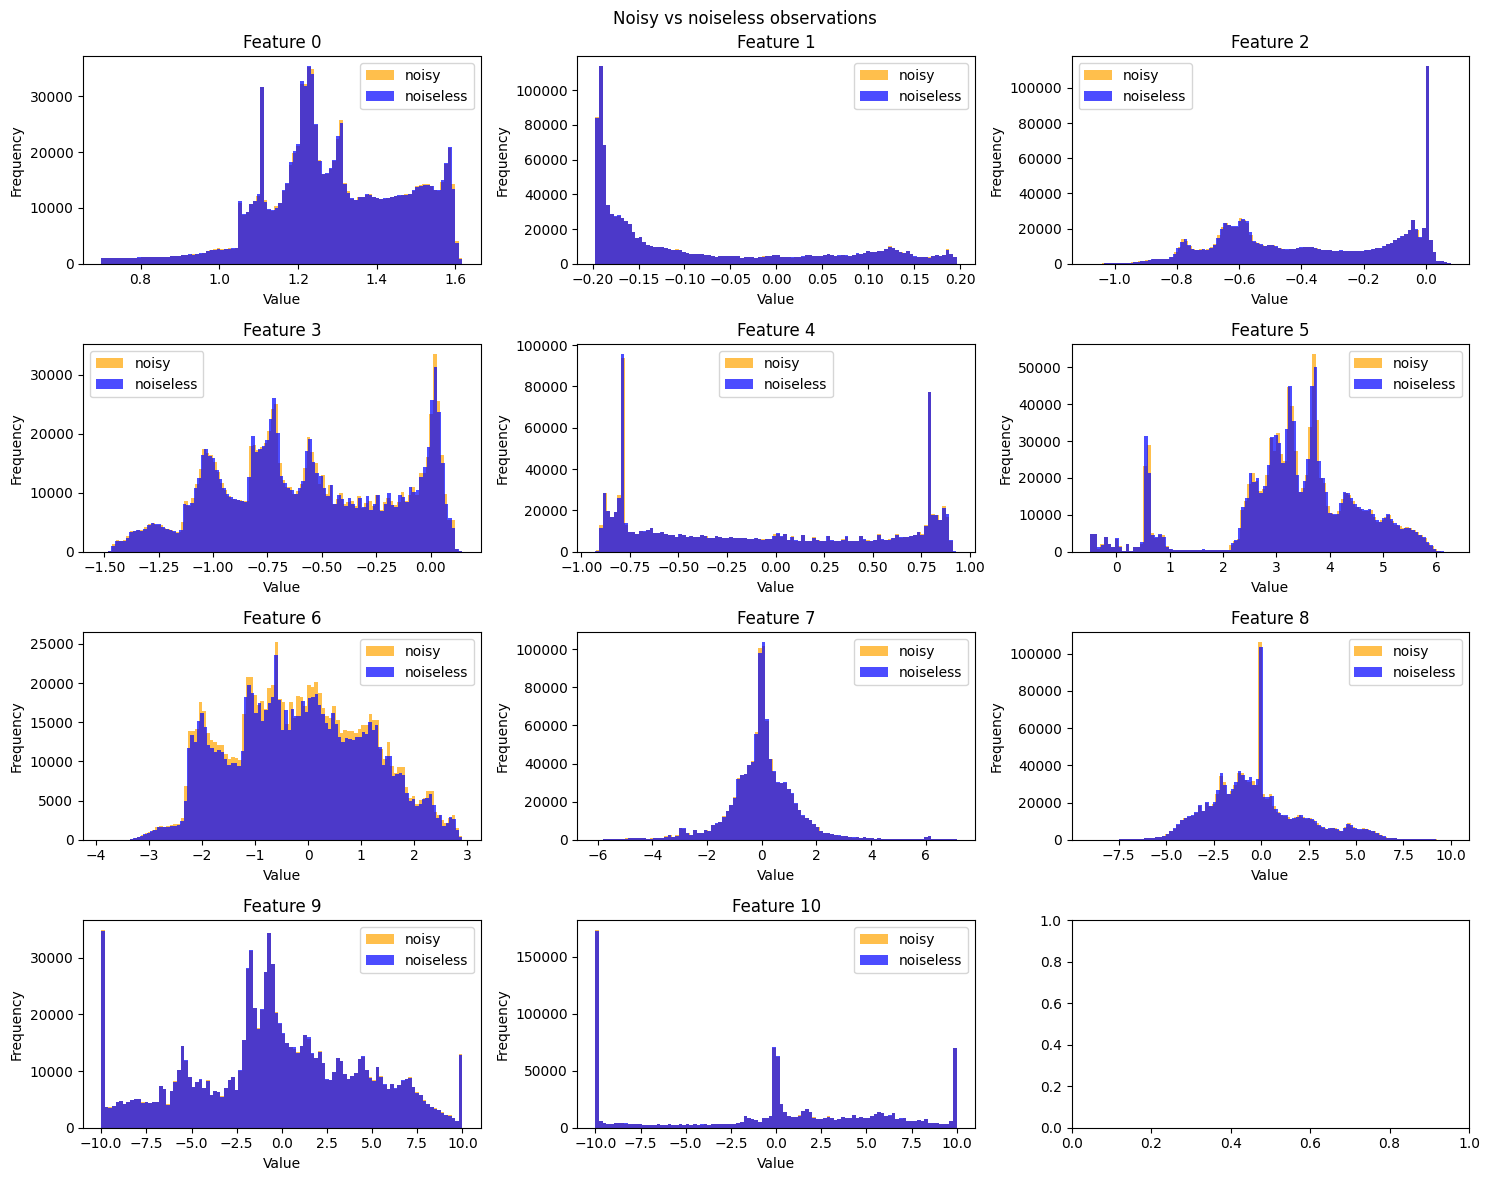

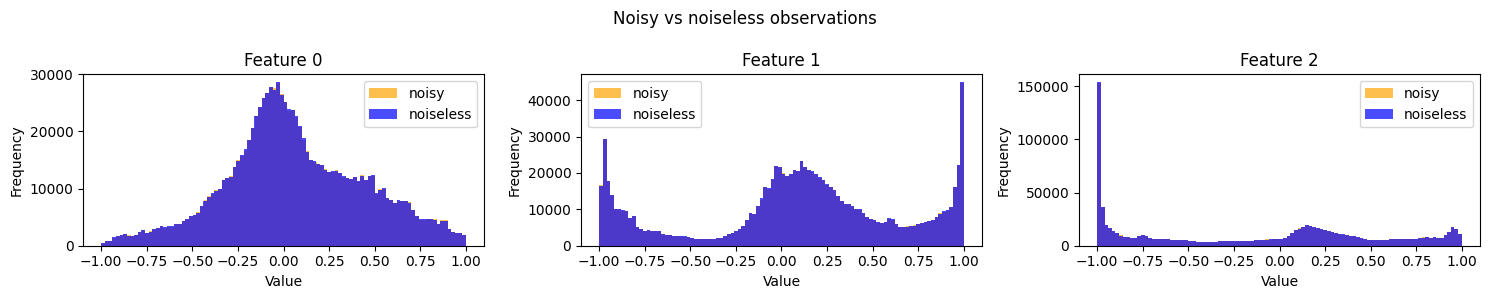

In [20]:
plot_features(data_noisy_add_0001['observation'], data_no_noisy['observation'], title = 'Noisy vs noiseless observations')
plot_features( data_noisy_add_0001['action'], data_no_noisy['action'],title = 'Noisy vs noiseless observations')

## Multiplied vs 0.001 multiplied noise

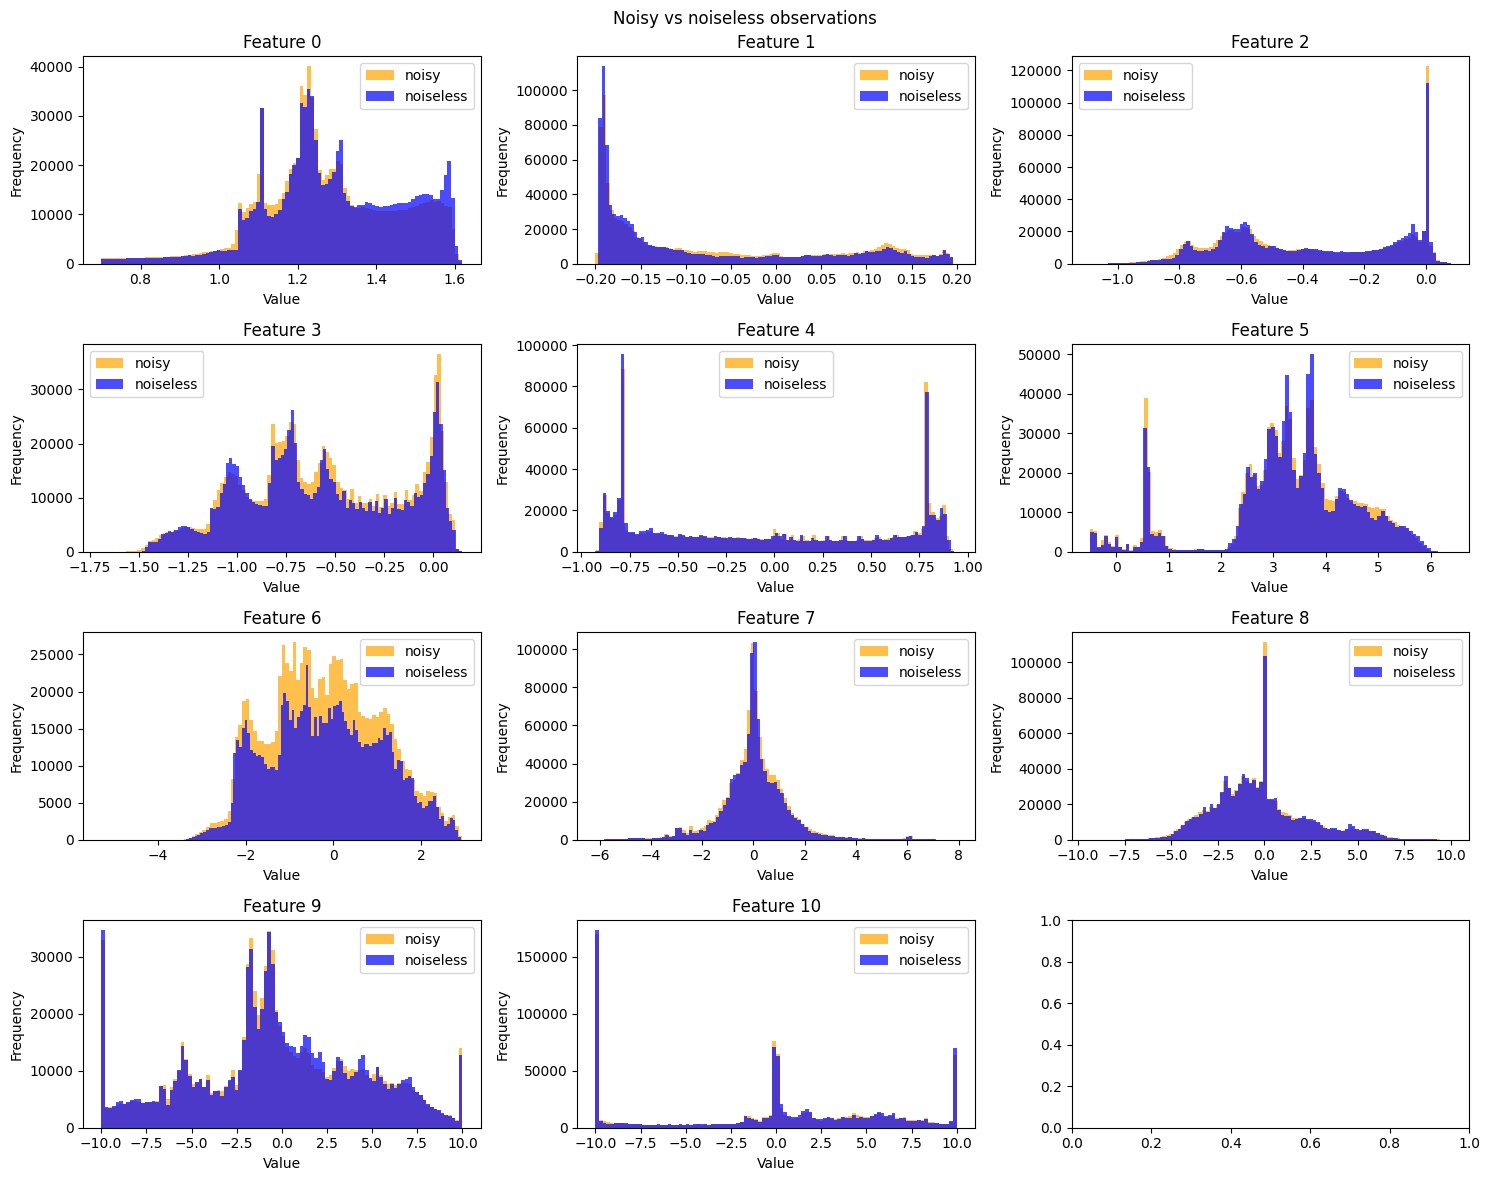

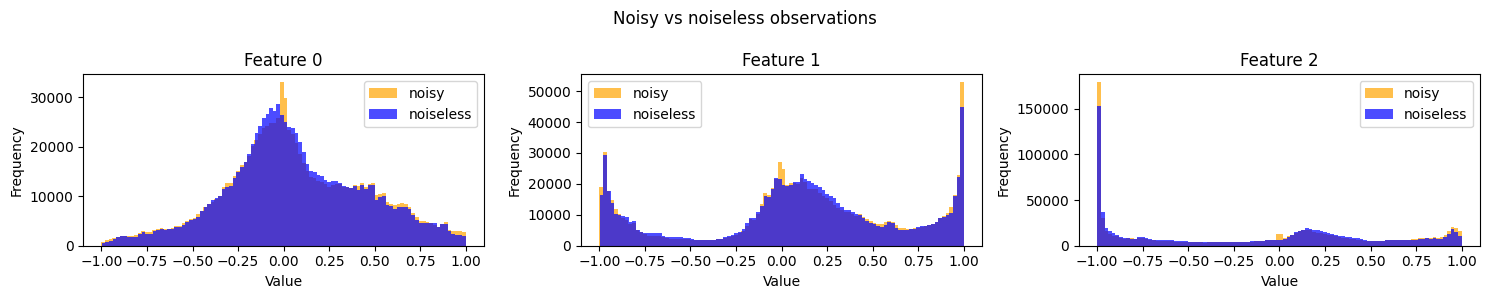

In [19]:
plot_features( data_noisy_mul['observation'], data_no_noisy['observation'],title = 'Noisy vs noiseless observations')
plot_features(data_noisy_mul['action'], data_no_noisy['action'], title = 'Noisy vs noiseless observations')

In [ ]:
/abiomed/intermediate_data_d4rl/sac_expert/Hopper-v2_action_noisy_added_0.001_0.1.pkl

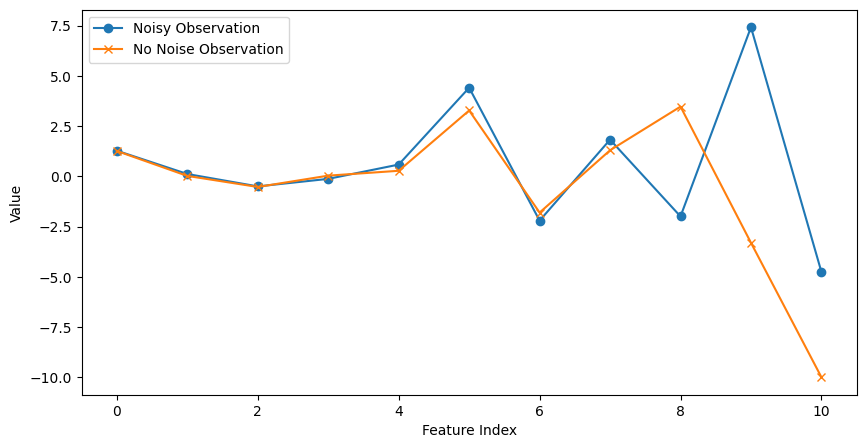

In [49]:

#plot one sample from the predicted next_observations ande eval_Data

sample_idx = 260
sample_pred = data_noisy_mul['observation'][sample_idx]
sample_gt = data_no_noisy['observation'][sample_idx]
plt.figure(figsize=(10, 5))
plt.plot(sample_pred, label='Noisy Observation', marker='o')
plt.plot(sample_gt, label='No Noise Observation', marker='x')
# plt.title('Sample Predicted vs Ground Truth Next Observation')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.show()


## increase the noise rate 

In [21]:

logdir = "/abiomed/intermediate_data_d4rl/sac_expert/Hopper-v2_action_noisy_added_0.001_0.1.pkl"
with open(logdir, 'rb') as f:
    data_noisy_0001_001 = pickle.load(f)

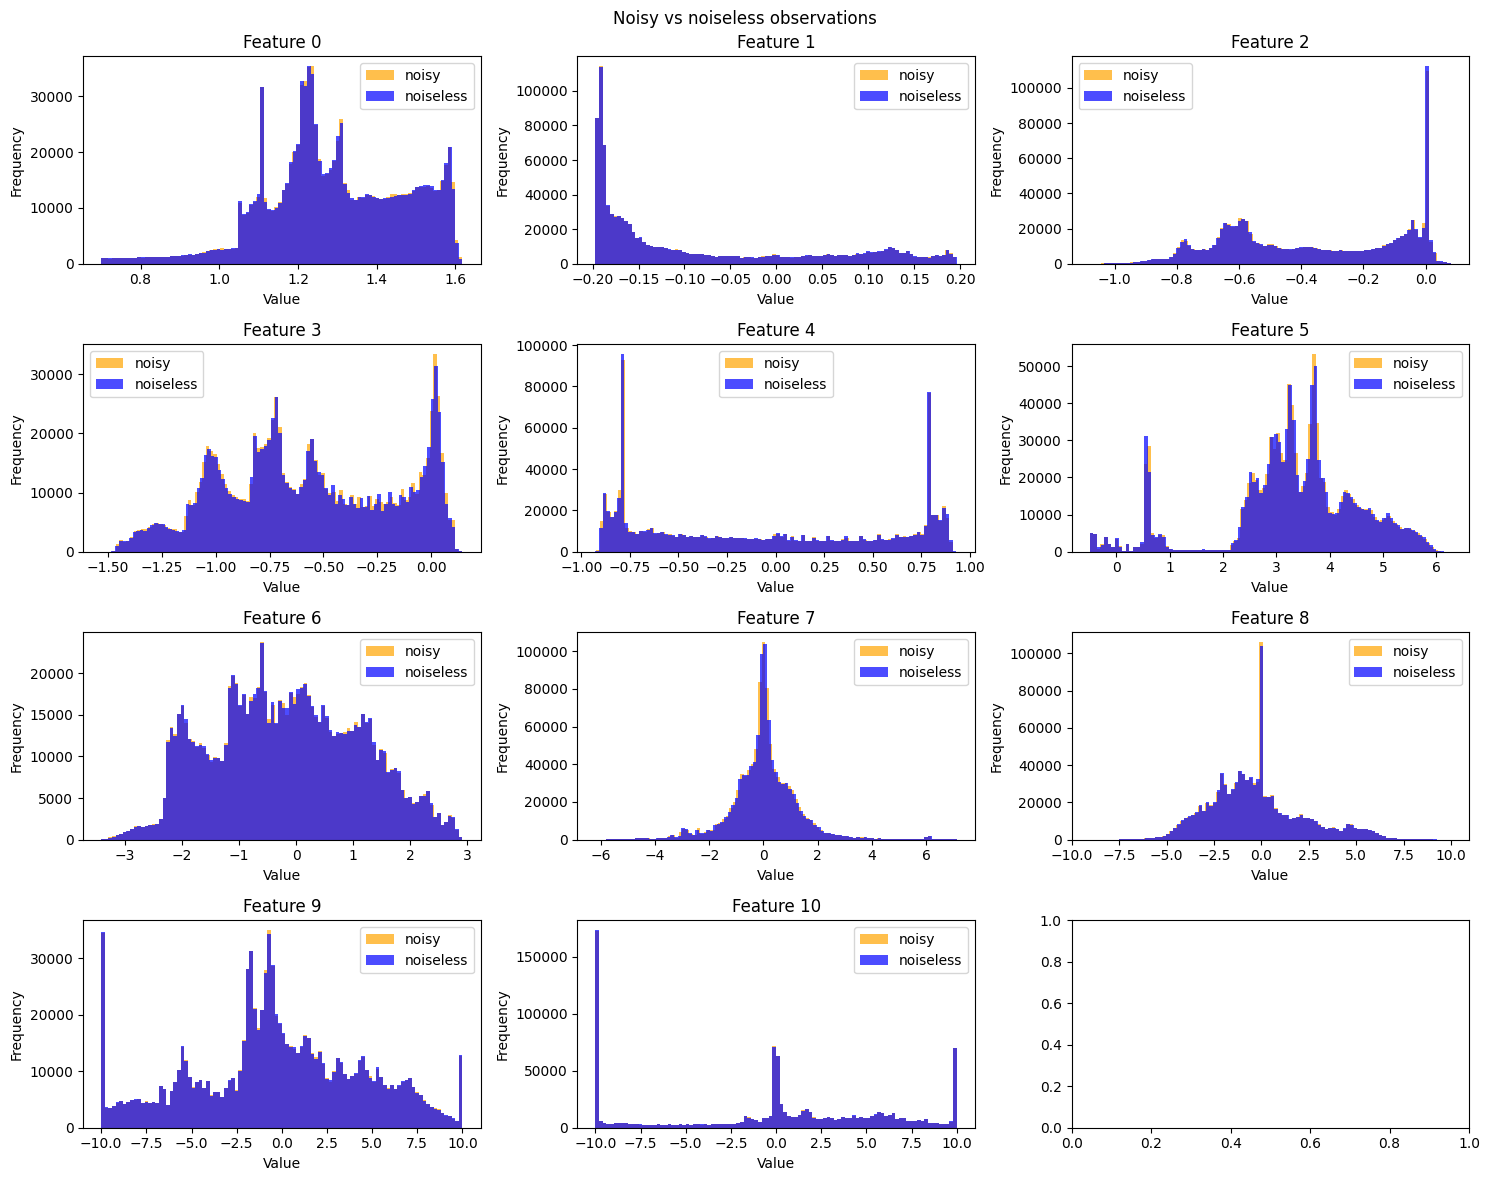

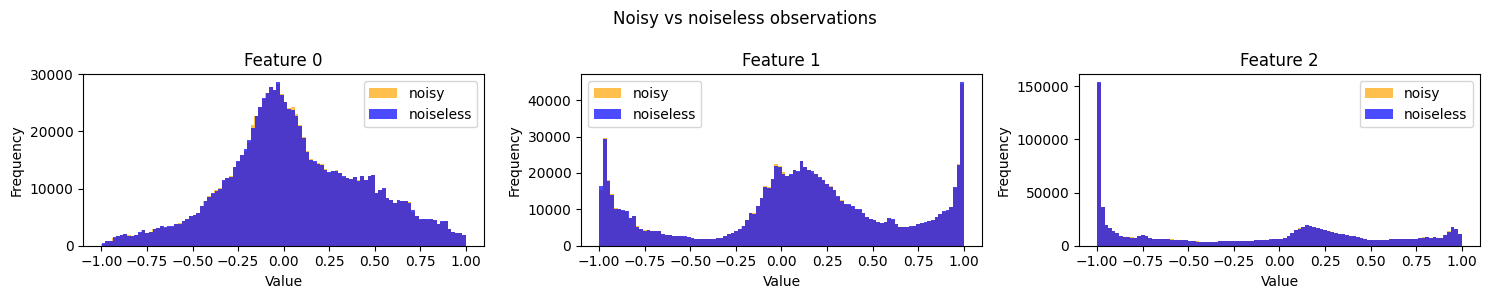

In [22]:
plot_features( data_noisy_0001_001['observation'], data_no_noisy['observation'],title = 'Noisy vs noiseless observations')
plot_features(data_noisy_0001_001['action'], data_no_noisy['action'], title = 'Noisy vs noiseless observations')

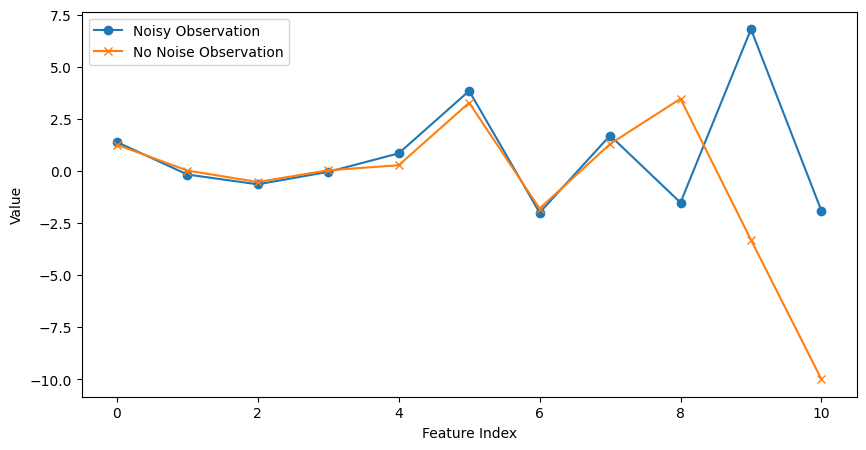

In [48]:

#plot one sample from the predicted next_observations ande eval_Data

sample_idx = 260
sample_pred = data_noisy_0001_001['observation'][sample_idx]
sample_gt = data_no_noisy['observation'][sample_idx]
plt.figure(figsize=(10, 5))
plt.plot(sample_pred, label='Noisy Observation', marker='o')
plt.plot(sample_gt, label='No Noise Observation', marker='x')
# plt.title('Sample Predicted vs Ground Truth Next Observation')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.show()


## increase the noise magnitude

In [23]:


logdir = "/abiomed/intermediate_data_d4rl/sac_expert/Hopper-v2_action_noisy_added_0.01_0.01.pkl"
with open(logdir, 'rb') as f:
    data_noisy_001_001 = pickle.load(f)

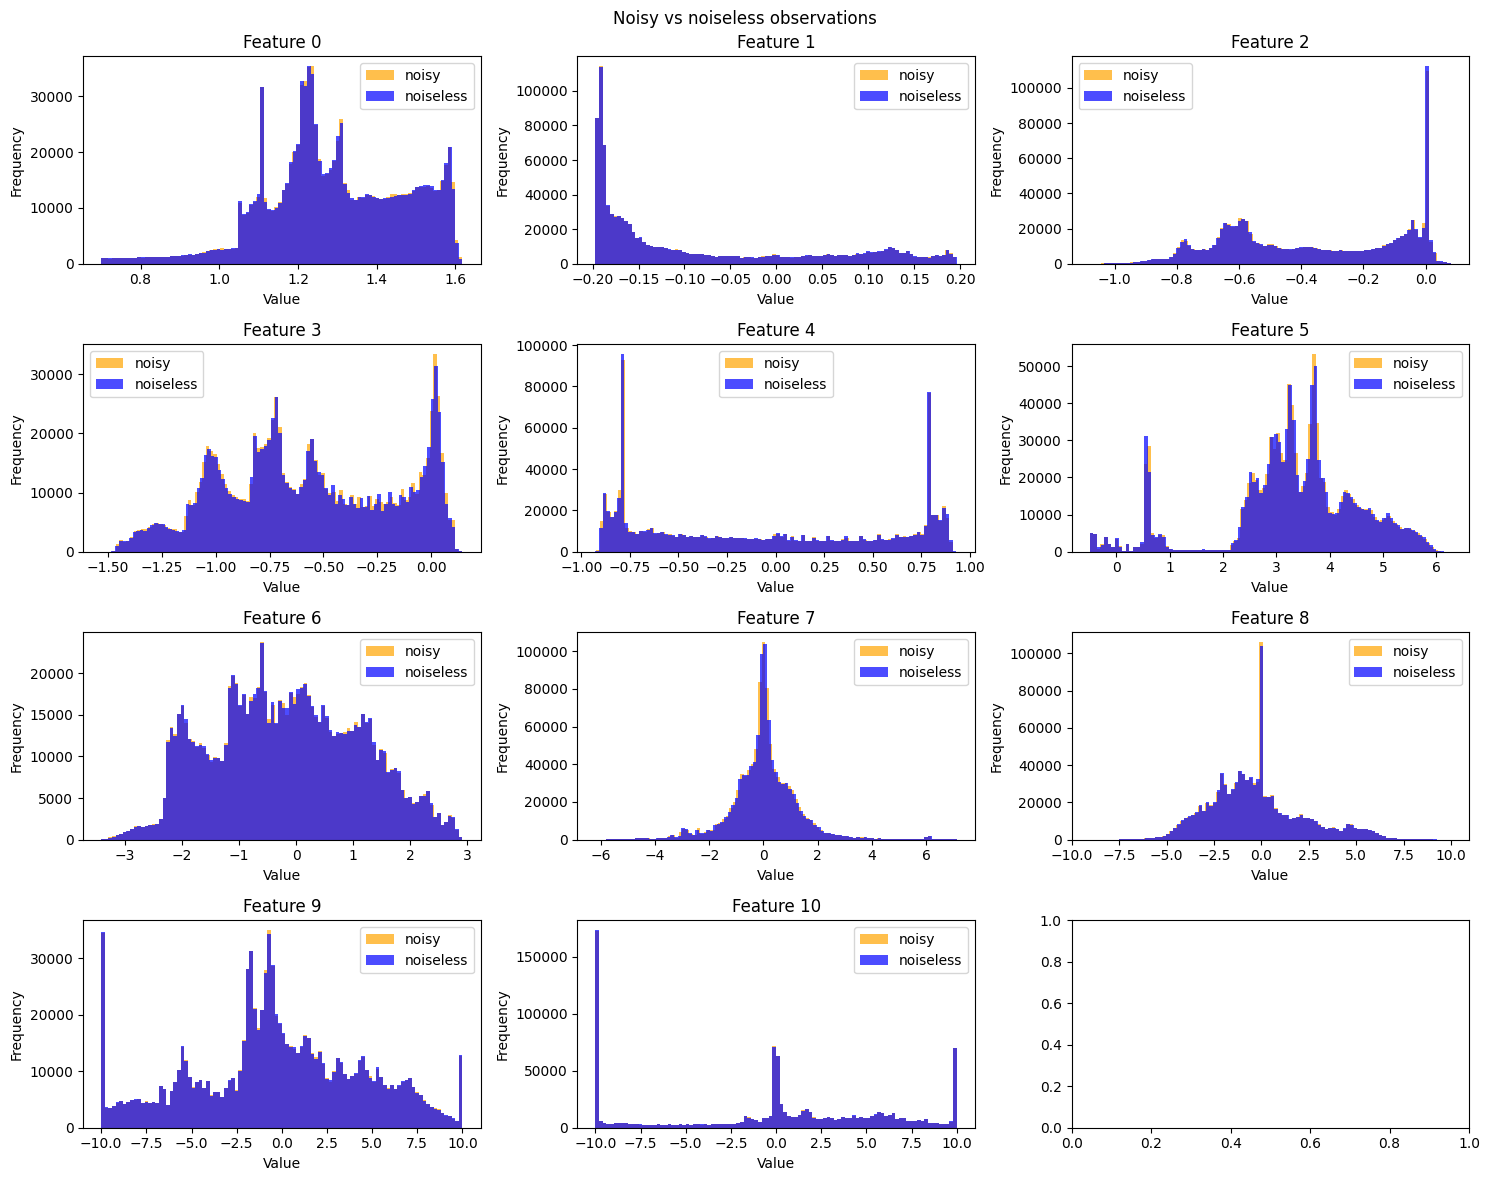

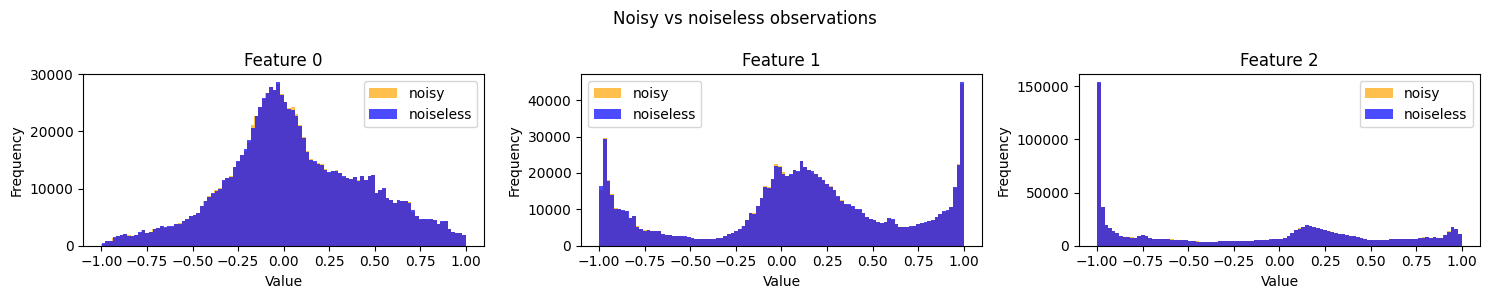

In [24]:
plot_features( data_noisy_0001_001['observation'], data_no_noisy['observation'],title = 'Noisy vs noiseless observations')
plot_features(data_noisy_0001_001['action'], data_no_noisy['action'], title = 'Noisy vs noiseless observations')

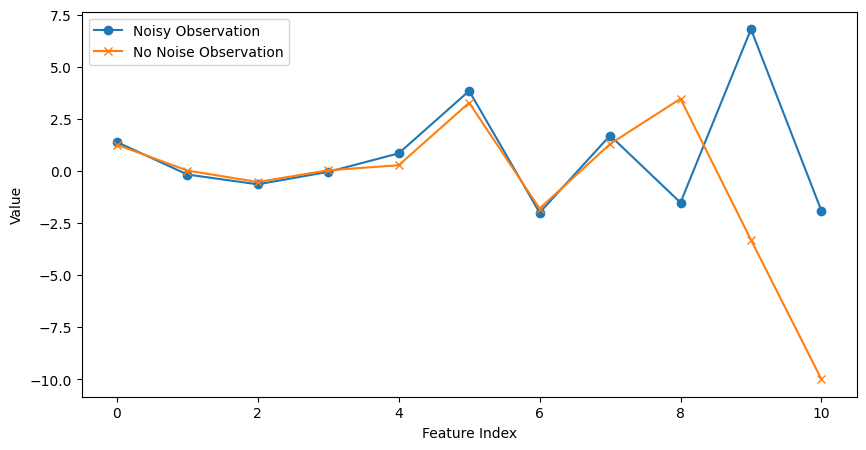

In [47]:

#plot one sample from the predicted next_observations ande eval_Data

sample_idx = 260
sample_pred = data_noisy_0001_001['observation'][sample_idx]
sample_gt = data_no_noisy['observation'][sample_idx]
plt.figure(figsize=(10, 5))
plt.plot(sample_pred, label='Noisy Observation', marker='o')
plt.plot(sample_gt, label='No Noise Observation', marker='x')
# plt.title('Sample Predicted vs Ground Truth Next Observation')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.show()


## noise rate=1 noise magnitude=0.001

logdir = "/abiomed/intermediate_data_d4rl/sac_expert/Hopper-v2_action_noisy_added_0.01_.pkl"
with open(logdir, 'rb') as f:
    data_noisy_001_001 = pickle.load(f)

In [37]:
logdir = "/abiomed/intermediate_data_d4rl/sac_expert/Hopper-v2_action_noisy_added_0.001_1.0.pkl"
with open(logdir, 'rb') as f:
    data_noisy_001_1 = pickle.load(f)

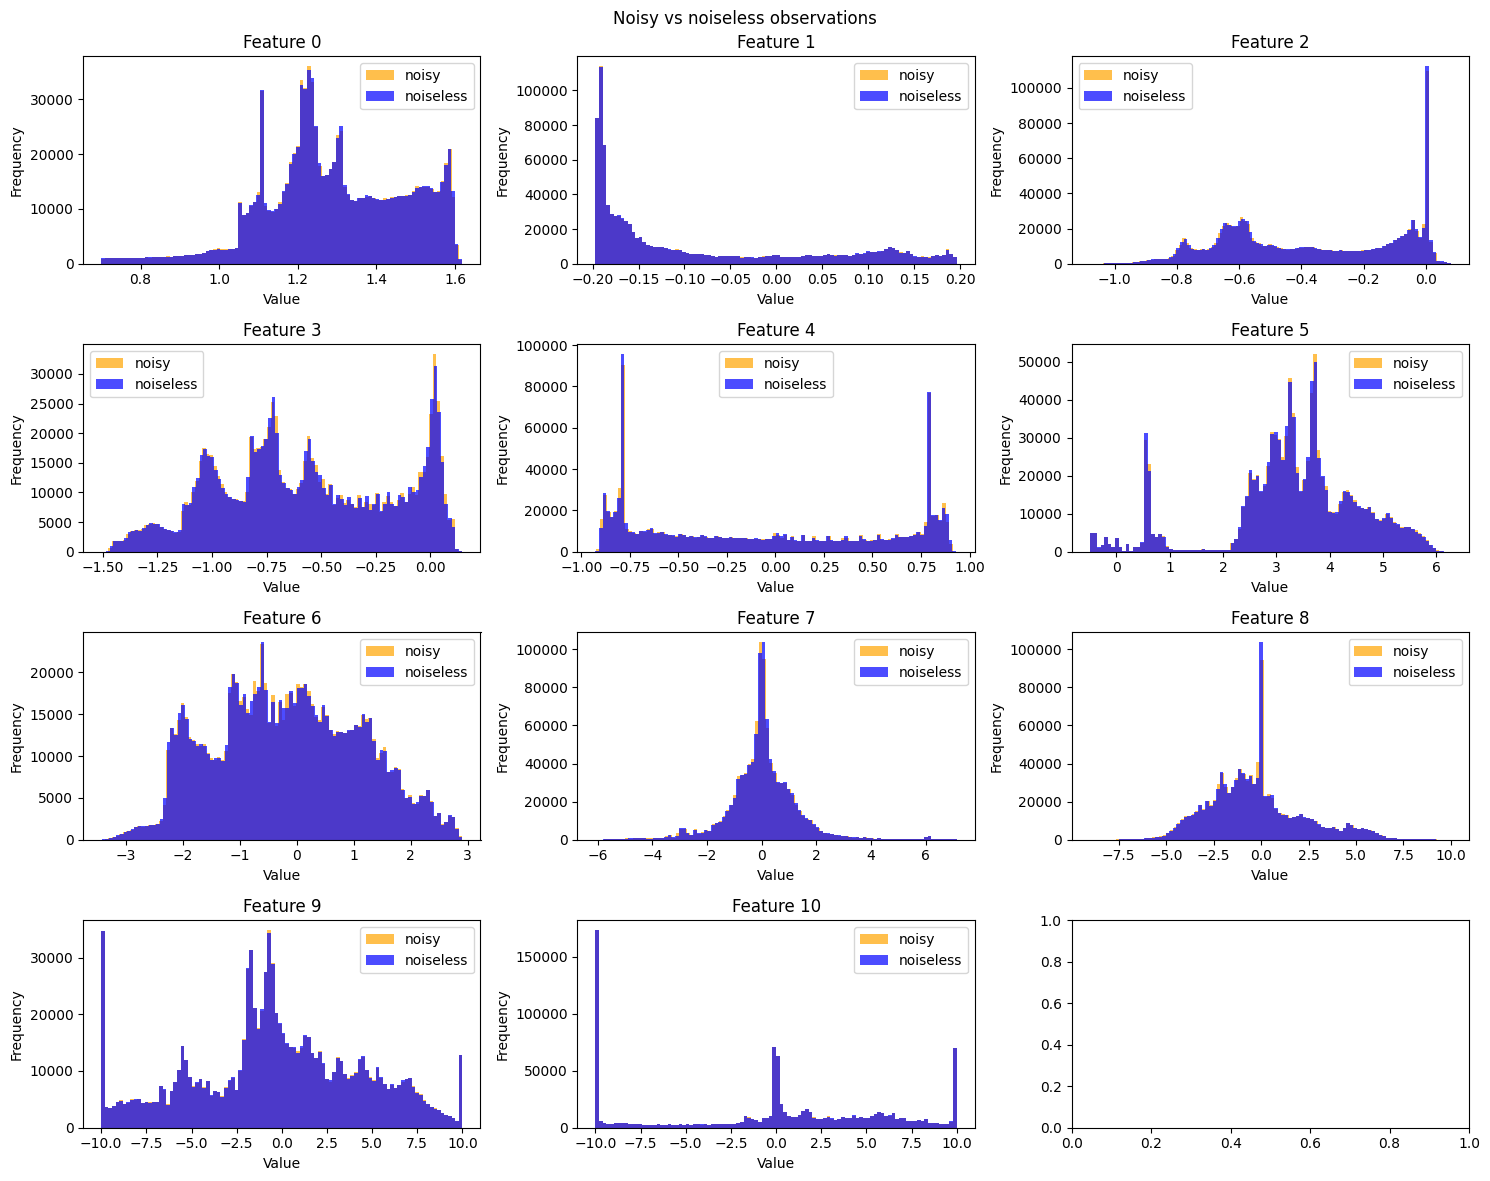

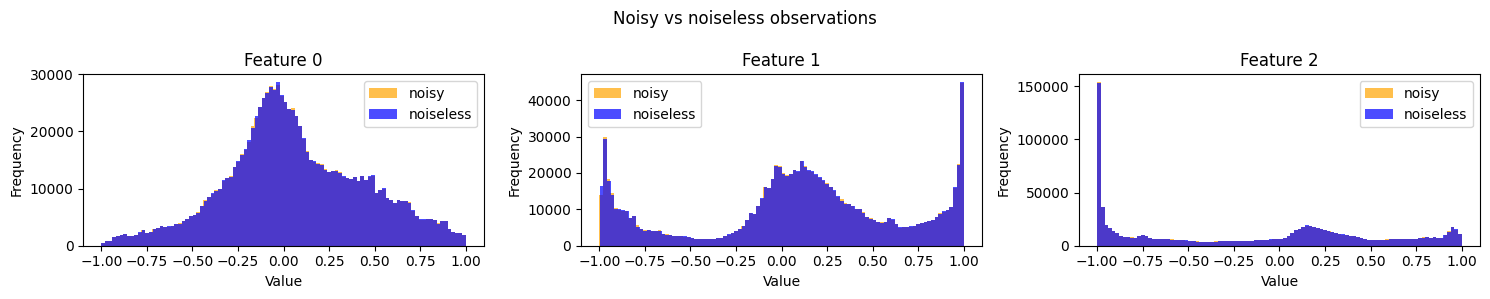

In [38]:
plot_features( data_noisy_001_1['observation'], data_no_noisy['observation'],title = 'Noisy vs noiseless observations')
plot_features(data_noisy_001_1['action'], data_no_noisy['action'], title = 'Noisy vs noiseless observations')

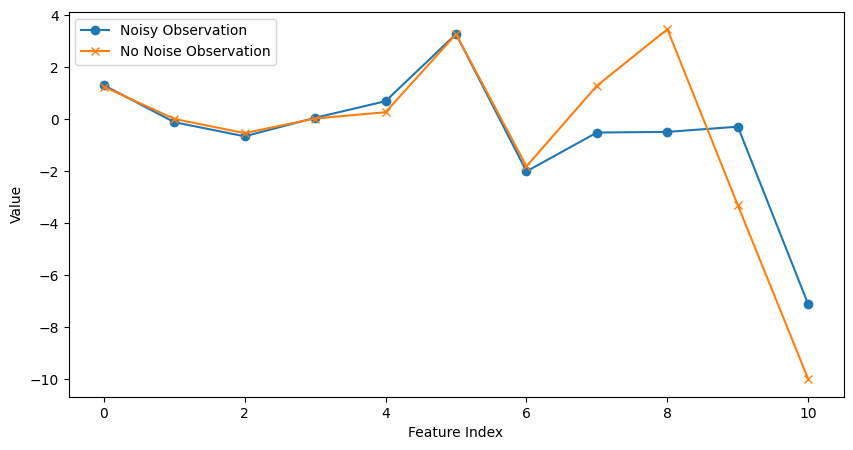

In [45]:

#plot one sample from the predicted next_observations ande eval_Data

sample_idx = 260
sample_pred = data_noisy_001_1['observation'][sample_idx]
sample_gt = data_no_noisy['observation'][sample_idx]
plt.figure(figsize=(10, 5))
plt.plot(sample_pred, label='Noisy Observation', marker='o')
plt.plot(sample_gt, label='No Noise Observation', marker='x')
# plt.title('Sample Predicted vs Ground Truth Next Observation')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.show()


## noise rate=1 noise magnitude=0.1

In [12]:

logdir = "/abiomed/intermediate_data_d4rl/sac_expert/Hopper-v2_action_noisy_added_0.1_1.0.pkl"
with open(logdir, 'rb') as f:
    data_noisy_01_1 = pickle.load(f)

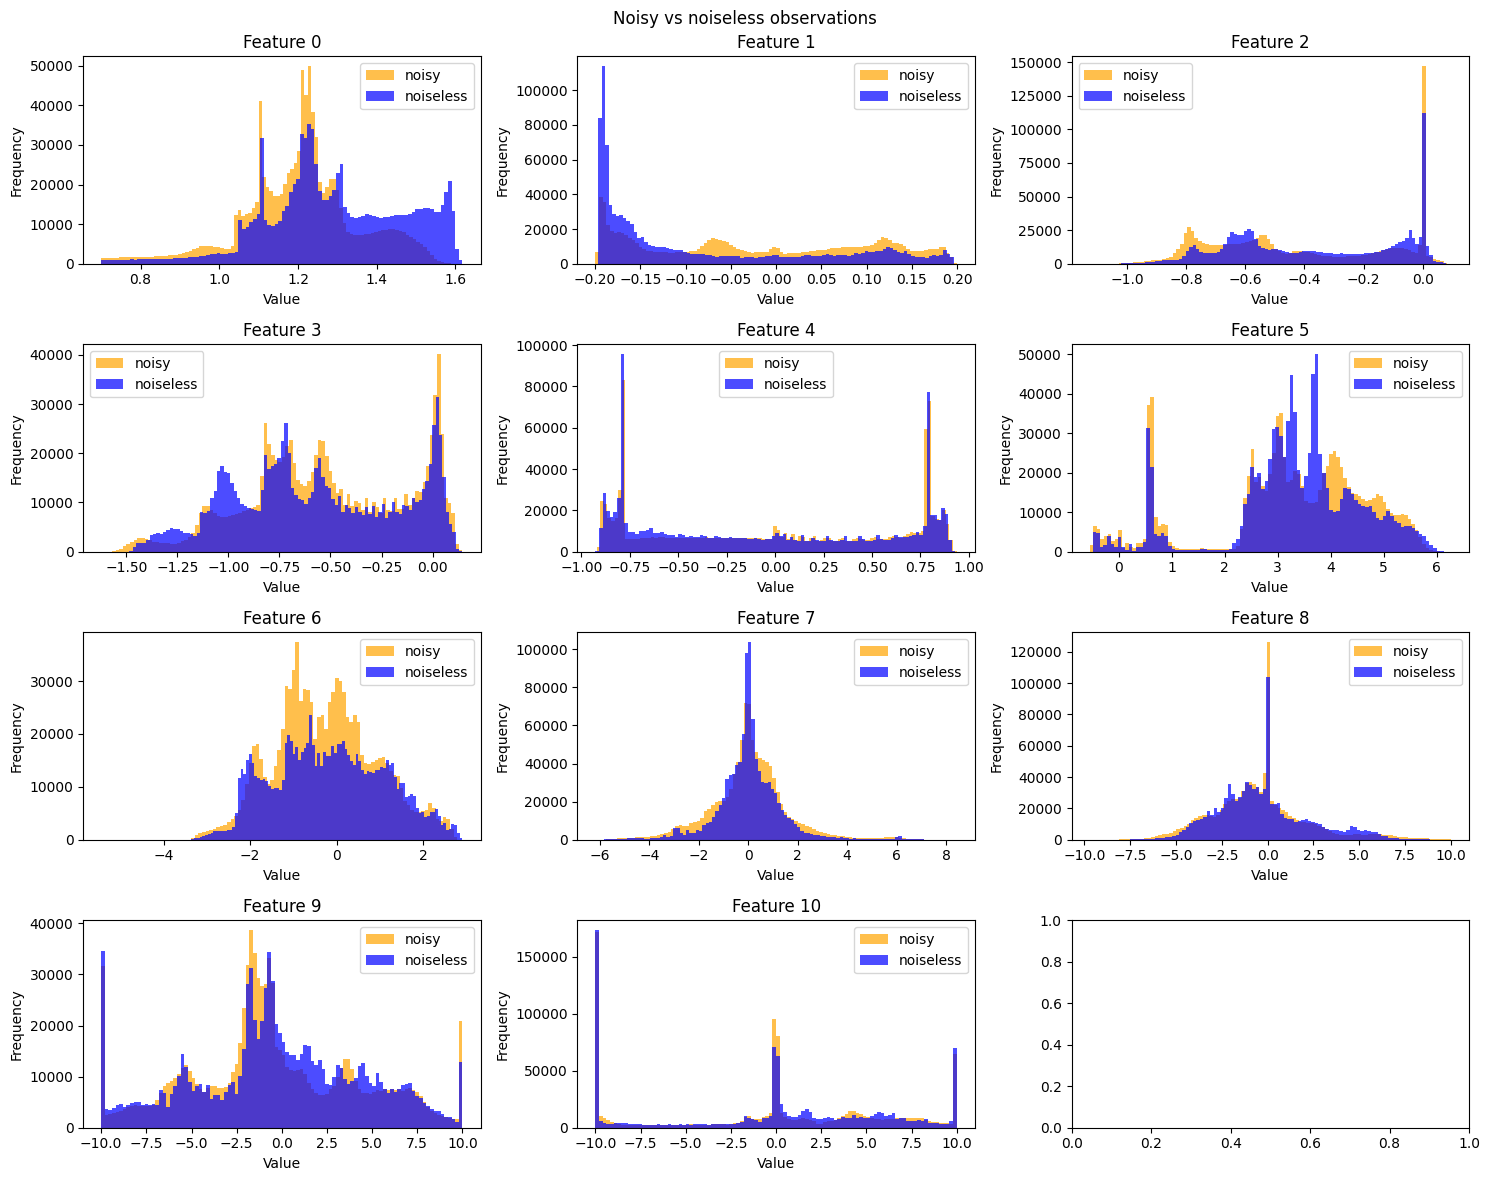

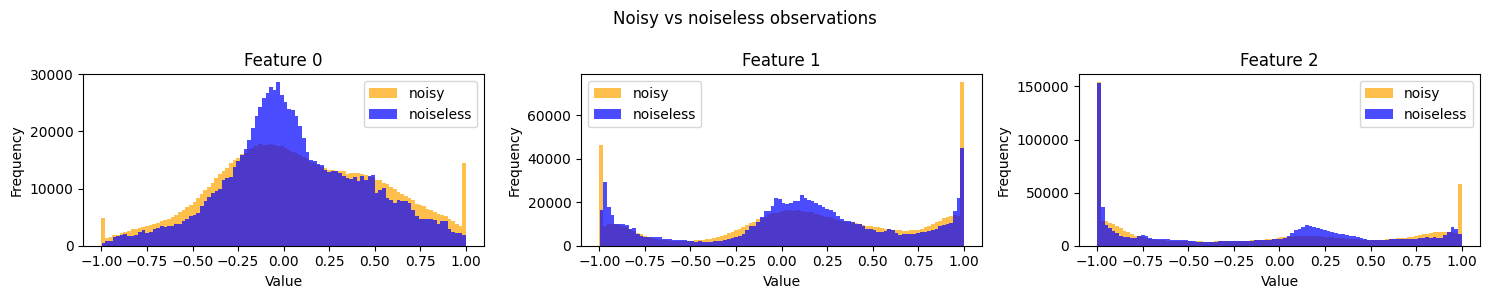

In [50]:
plot_features( data_noisy_01_1['observation'], data_no_noisy['observation'],title = 'Noisy vs noiseless observations')
plot_features(data_noisy_01_1['action'], data_no_noisy['action'], title = 'Noisy vs noiseless observations')

In [ ]:
#the rewards of expert policy -SAC, TQC

In [56]:
data_noisy_01_1

data_noisy_01_1['observations'] = data_noisy_01_1['observation']
data_noisy_01_1['actions'] = data_noisy_01_1['action']
data_noisy_01_1['next_observations'] = data_noisy_01_1['next_observation']
data_noisy_01_1['rewards'] = data_noisy_01_1['reward']
data_noisy_01_1['terminals'] = data_noisy_01_1['terminal']

#save
logdir = "/abiomed/intermediate_data_d4rl/sac_expert/Hopper-v2_action_noisy_added_0.1_1.0.pkl"
with open(logdir, 'wb') as f:
    pickle.dump(data_noisy_01_1, f)



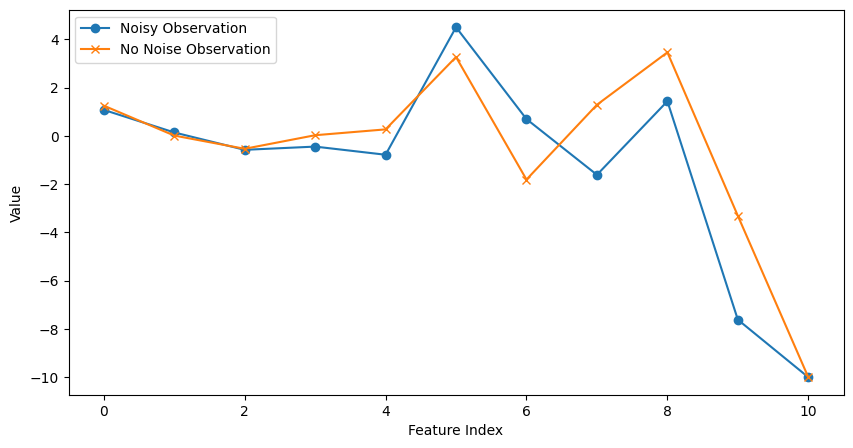

In [51]:

#plot one sample from the predicted next_observations ande eval_Data

sample_idx = 260
sample_pred = data_noisy_01_1['observation'][sample_idx]
sample_gt = data_no_noisy['observation'][sample_idx]
plt.figure(figsize=(10, 5))
plt.plot(sample_pred, label='Noisy Observation', marker='o')
plt.plot(sample_gt, label='No Noise Observation', marker='x')
# plt.title('Sample Predicted vs Ground Truth Next Observation')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [52]:

logdir = "/abiomed/intermediate_data_d4rl/sac_expert/Hopper-v2_action_noisy_added_0.5_1.0.pkl"
with open(logdir, 'rb') as f:
    data_noisy_05_1 = pickle.load(f)

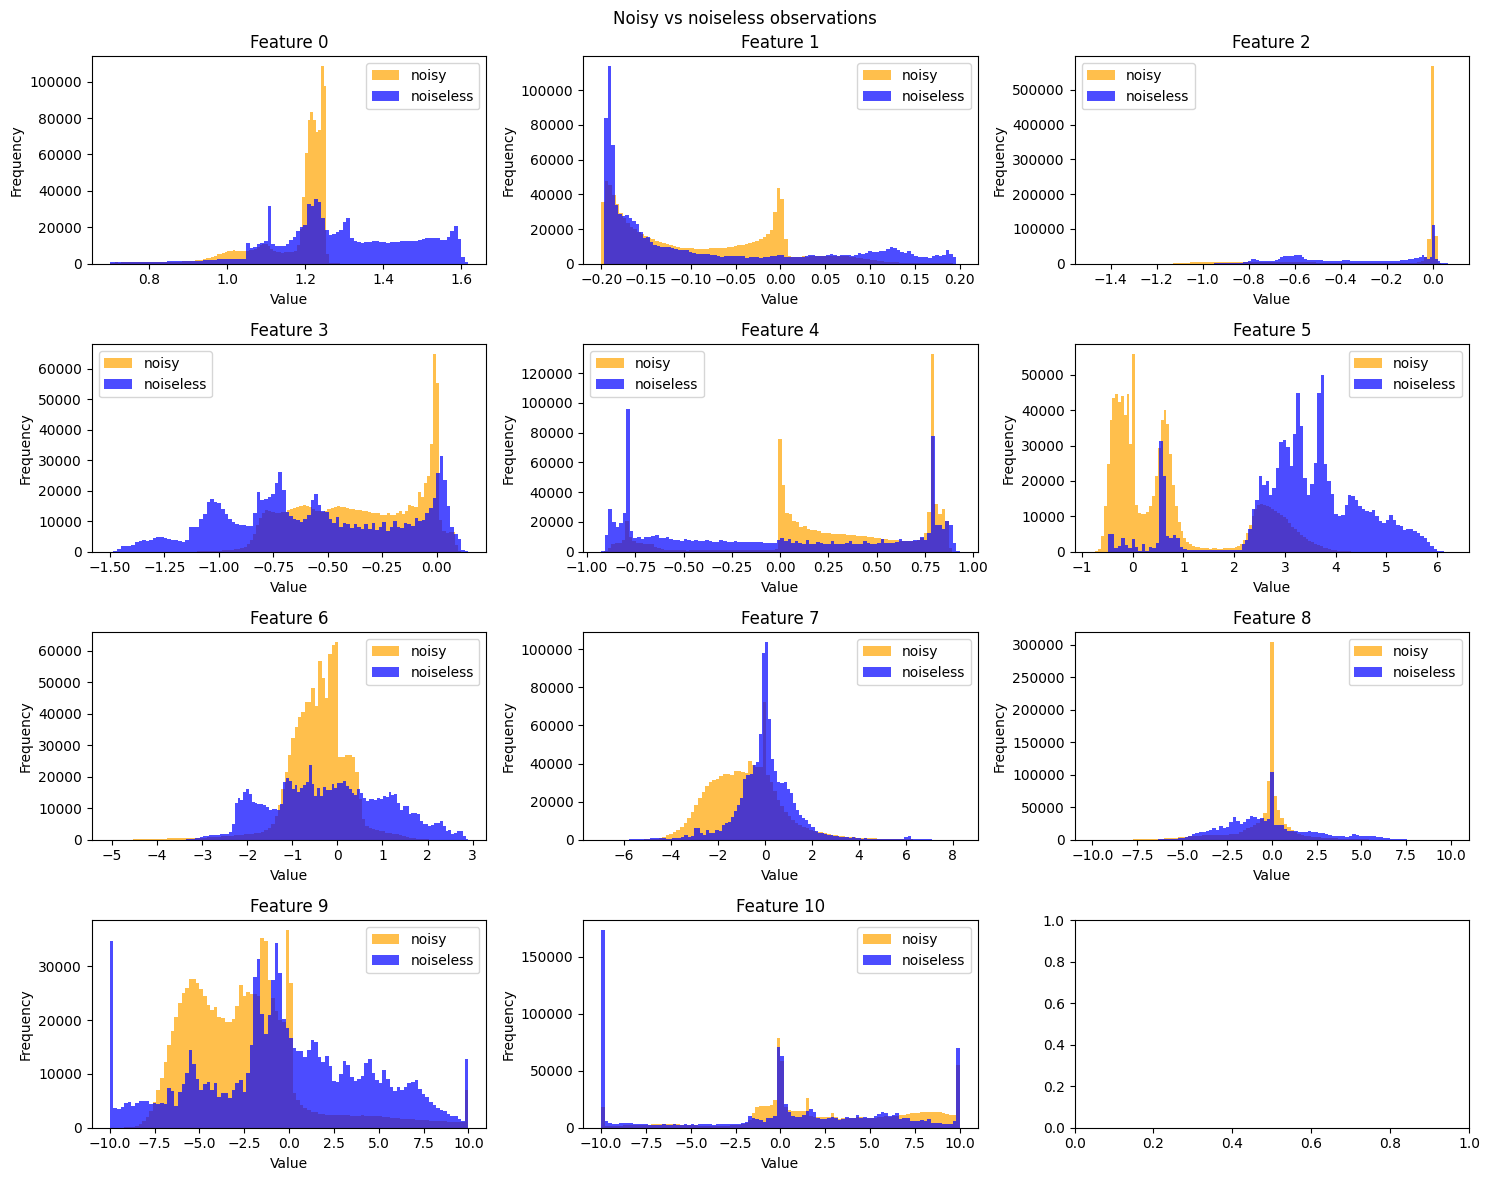

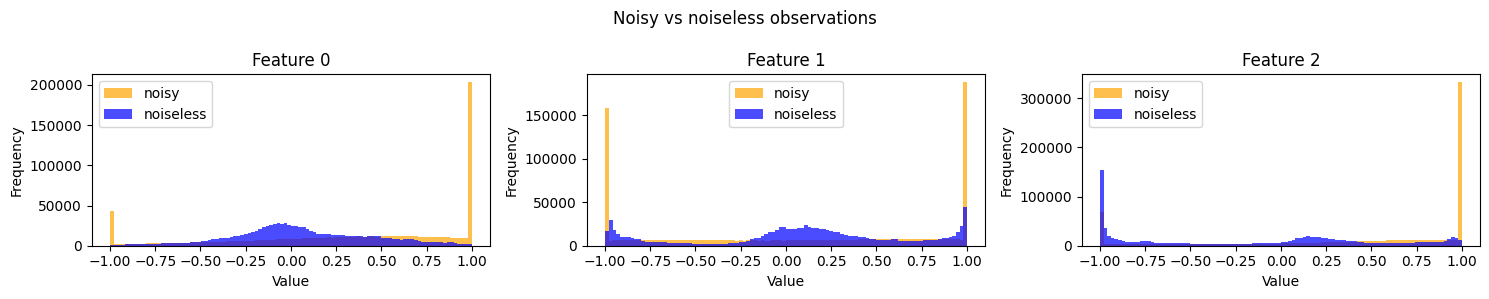

In [53]:
plot_features( data_noisy_05_1['observation'], data_no_noisy['observation'],title = 'Noisy vs noiseless observations')
plot_features(data_noisy_05_1['action'], data_no_noisy['action'], title = 'Noisy vs noiseless observations')

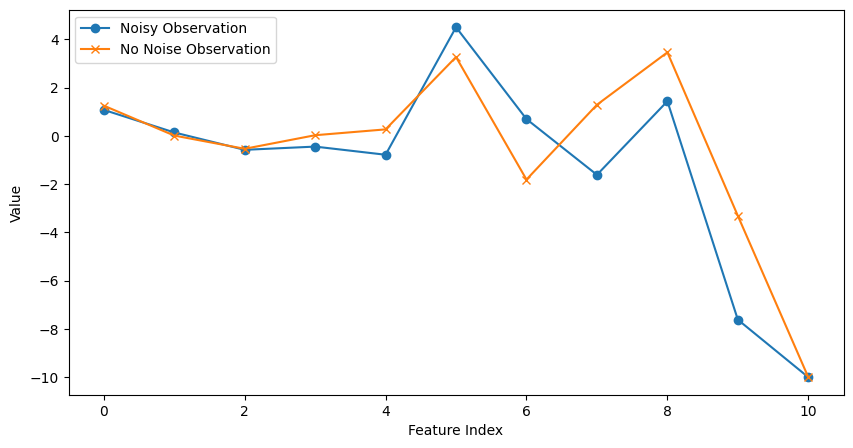

In [54]:

#plot one sample from the predicted next_observations ande eval_Data

sample_idx = 260
sample_pred = data_noisy_01_1['observation'][sample_idx]
sample_gt = data_no_noisy['observation'][sample_idx]
plt.figure(figsize=(10, 5))
plt.plot(sample_pred, label='Noisy Observation', marker='o')
plt.plot(sample_gt, label='No Noise Observation', marker='x')
# plt.title('Sample Predicted vs Ground Truth Next Observation')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [11]:
logdir = "/abiomed/intermediate_data_d4rl/sac_expert/Hopper-v2_action_obs_noisy_0.1_1.0.pkl"
with open(logdir, 'rb') as f:
    data_noisy_01_1_tr = pickle.load(f)
plot_features( data_noisy_01_1_tr['observation'], data_no_noisy['observation'],title = 'Noisy vs noiseless observations')
plot_features(data_noisy_01_1_tr['action'], data_no_noisy['action'], title = 'Noisy vs noiseless observations')

NameError: name 'data_no_noisy' is not defined

In [ ]:

logdir = "/abiomed/intermediate_data_d4rl/sac_expert/Hopper-v2_expert_2200.pkl"
with open(logdir, 'rb') as f:
    expert_2200 = pickle.load(f)
plot_features( expert_2200['observations'], data['observations'],title = 'Noisy vs noiseless observations')
plot_features(expert_2200['actions'], data['actions'], title = 'Noisy vs noiseless observations')

## compare dataset creation

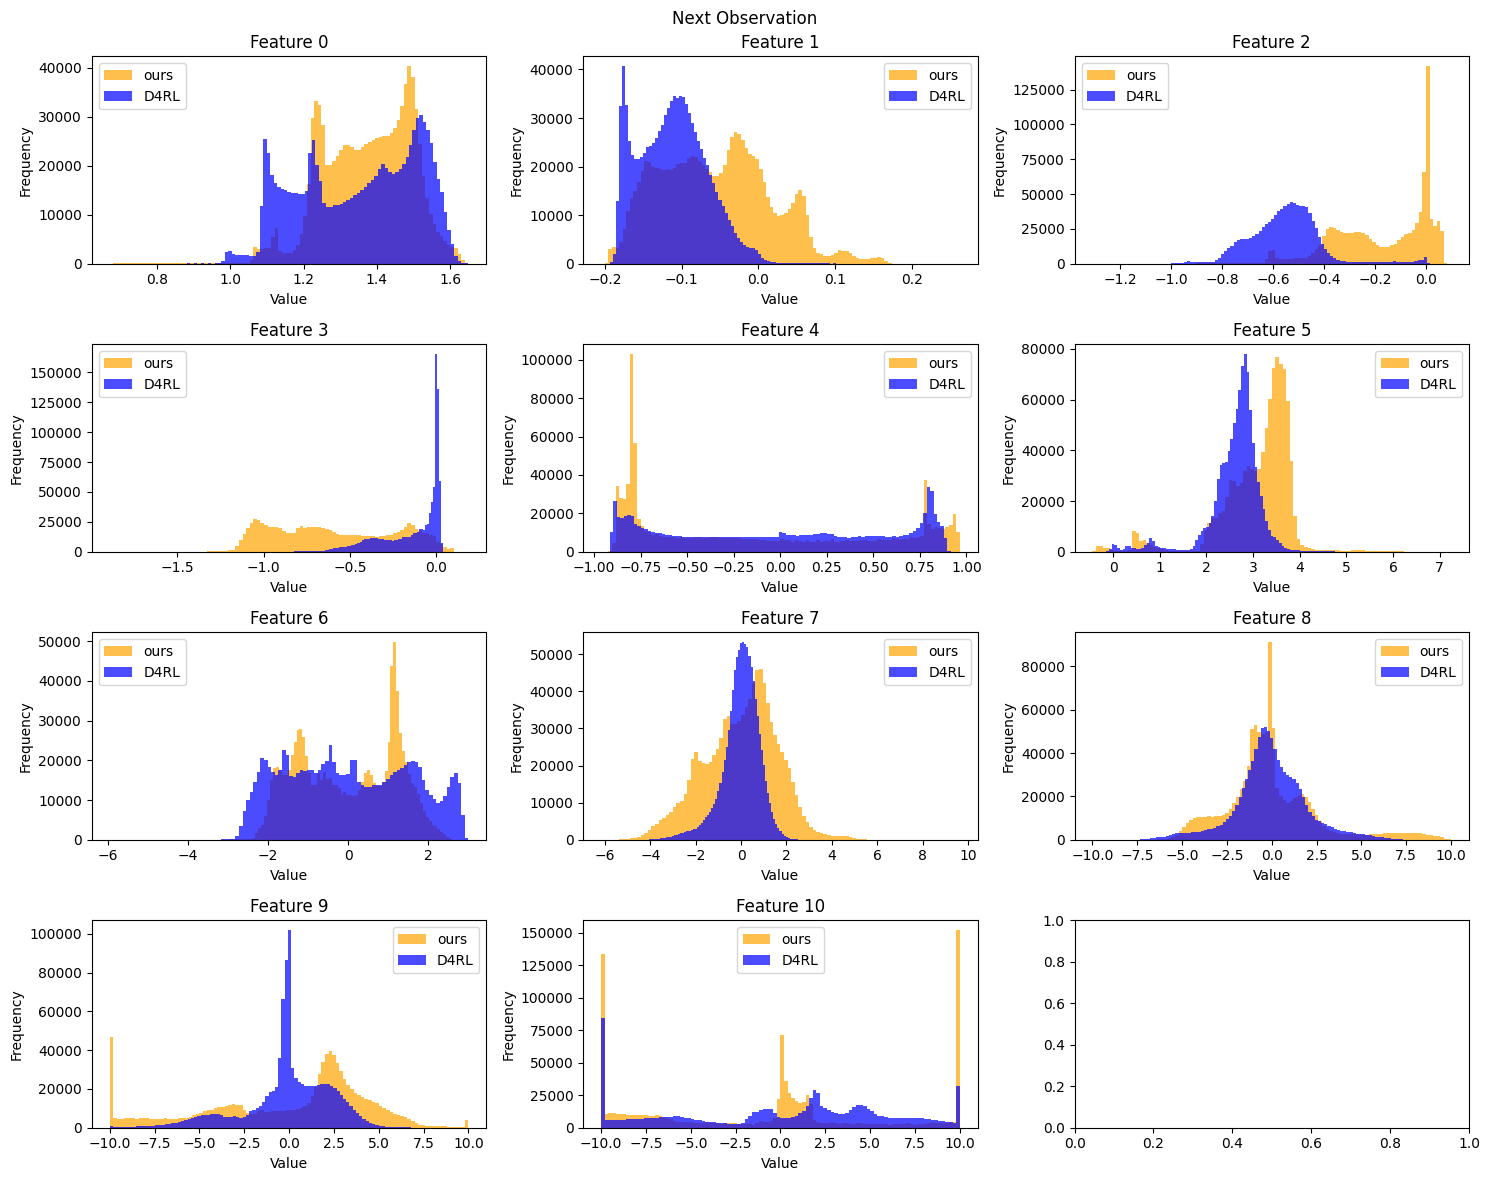

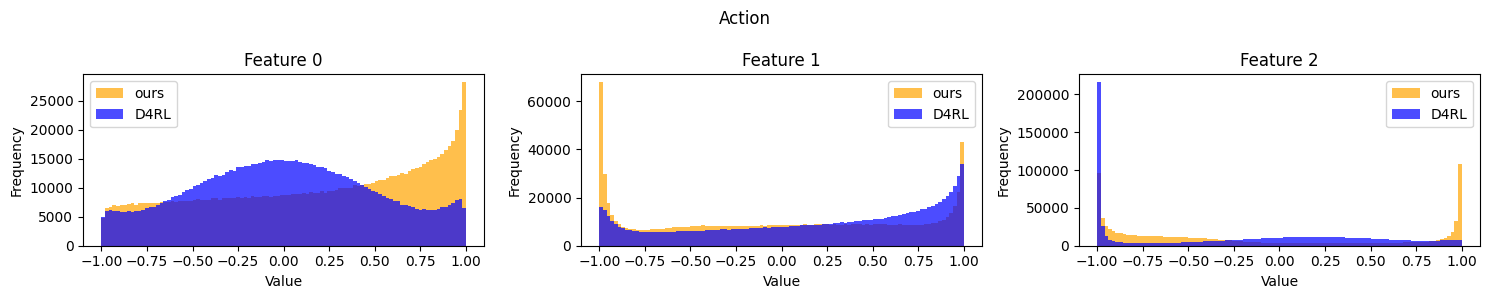

In [10]:
logdir = "/abiomed/intermediate_data_d4rl/farama_sac_expert/Hopper-v2_expert_1000.pkl"
with open(logdir, 'rb') as f:
    d4rl_expert = pickle.load(f)
plot_features( d4rl_expert['next_observations'], data['next_observations'],title = 'Next Observation', label1='ours', label2='D4RL')
plot_features(d4rl_expert['actions'], data['actions'], title = 'Action', label1='ours', label2='D4RL')


In [11]:
d4rl_expert['observations'].shape

(999200, 11)

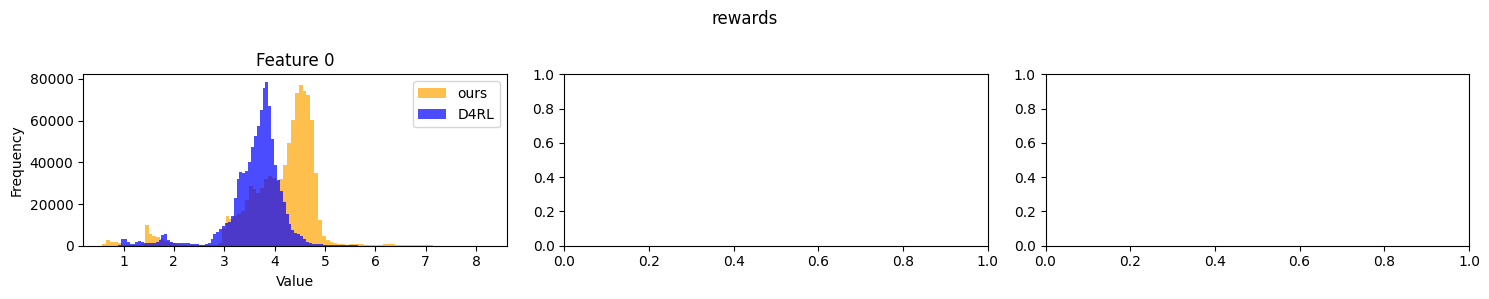

In [9]:
plot_features(d4rl_expert['rewards'].reshape(-1,1), data['rewards'].reshape(-1,1), title = 'rewards', label1='ours', label2='D4RL')

## action-transition noise

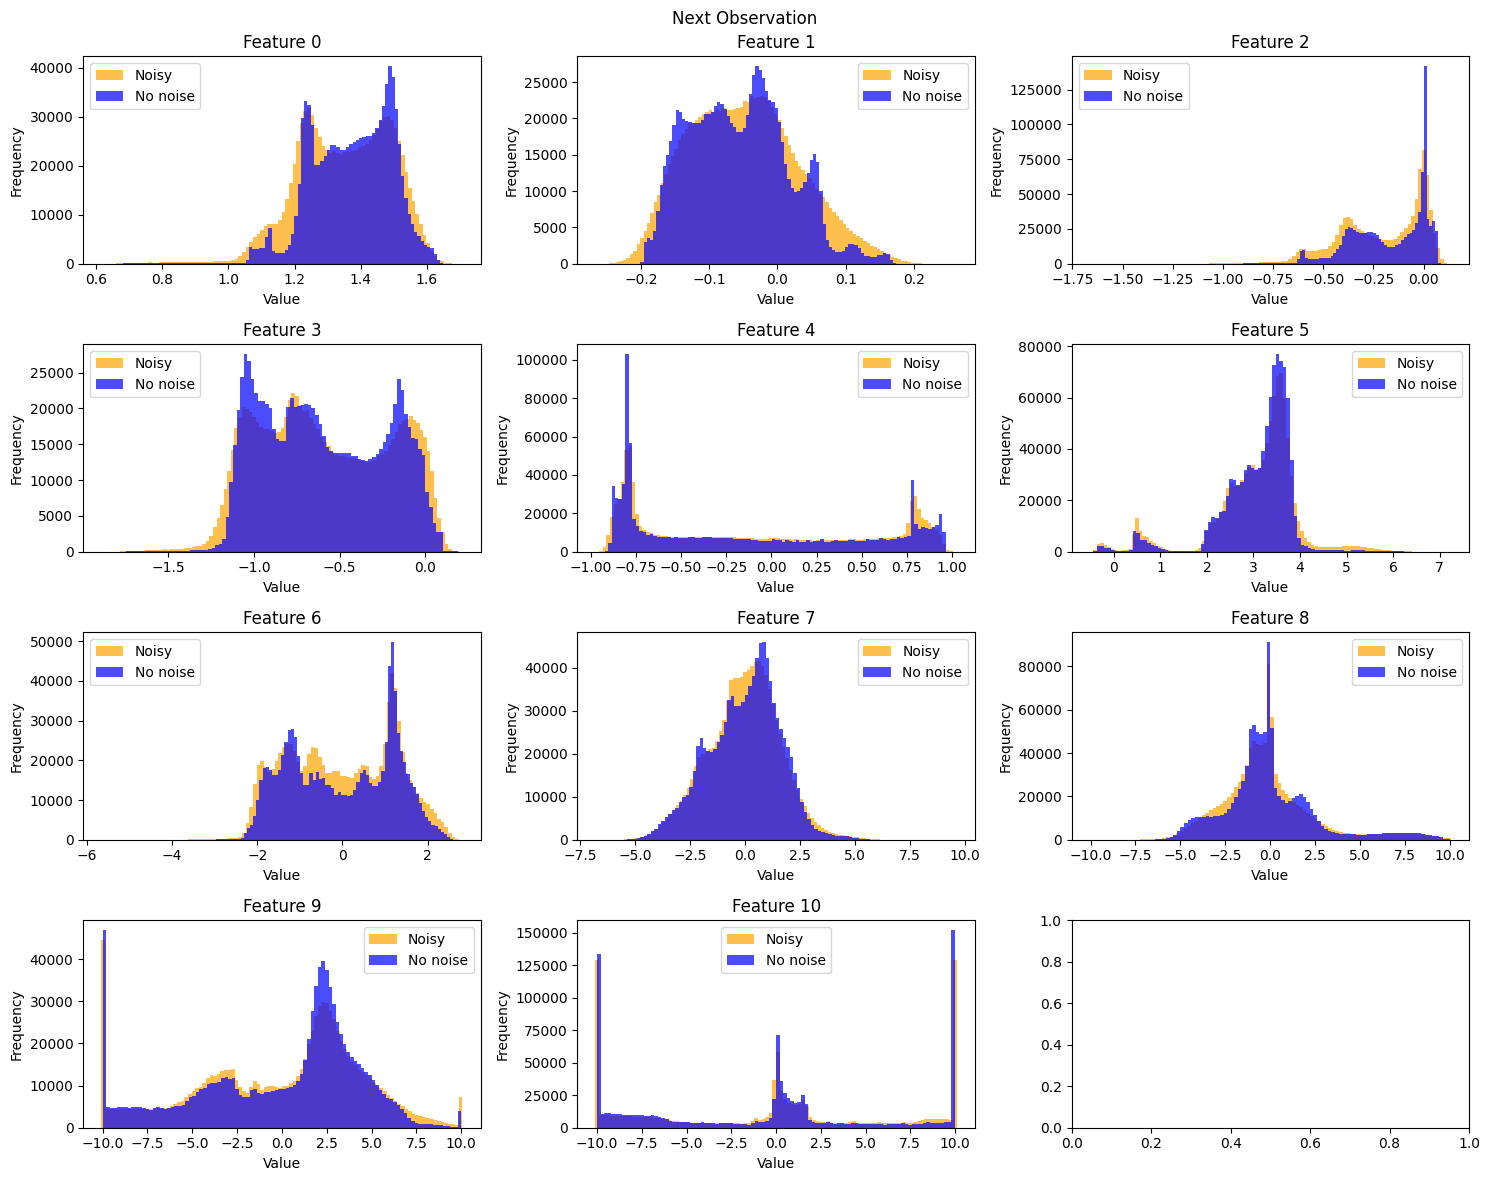

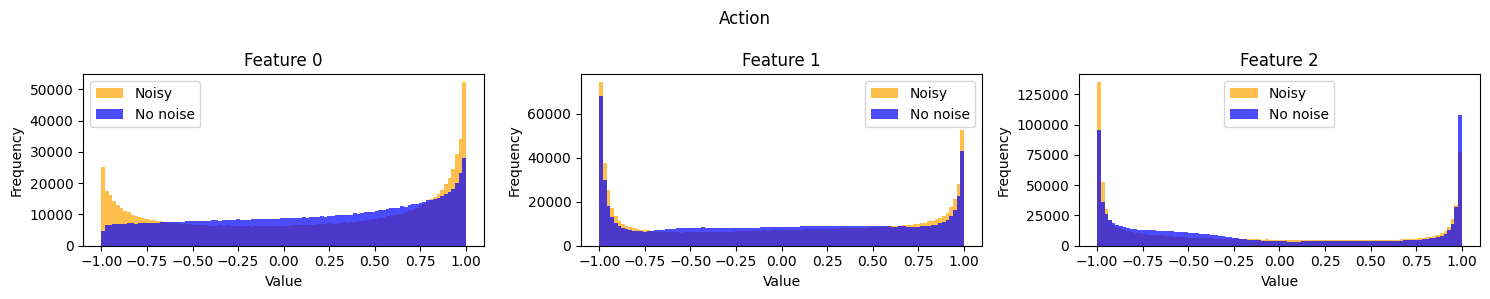

In [10]:
logdir ="/abiomed/intermediate_data_d4rl/farama_sac_expert/Hopper-v2_action_obs_noisy_0.02_1.0_0.02_1.0.pkl"
with open(logdir, 'rb') as f:
    noisy_1 = pickle.load(f)

plot_features( noisy_1['next_observations'], d4rl_expert['next_observations'],title = 'Next Observation', label1='Noisy', label2='No noise')
plot_features(noisy_1['actions'], d4rl_expert['actions'], title = 'Action', label1='Noisy', label2='No noise')

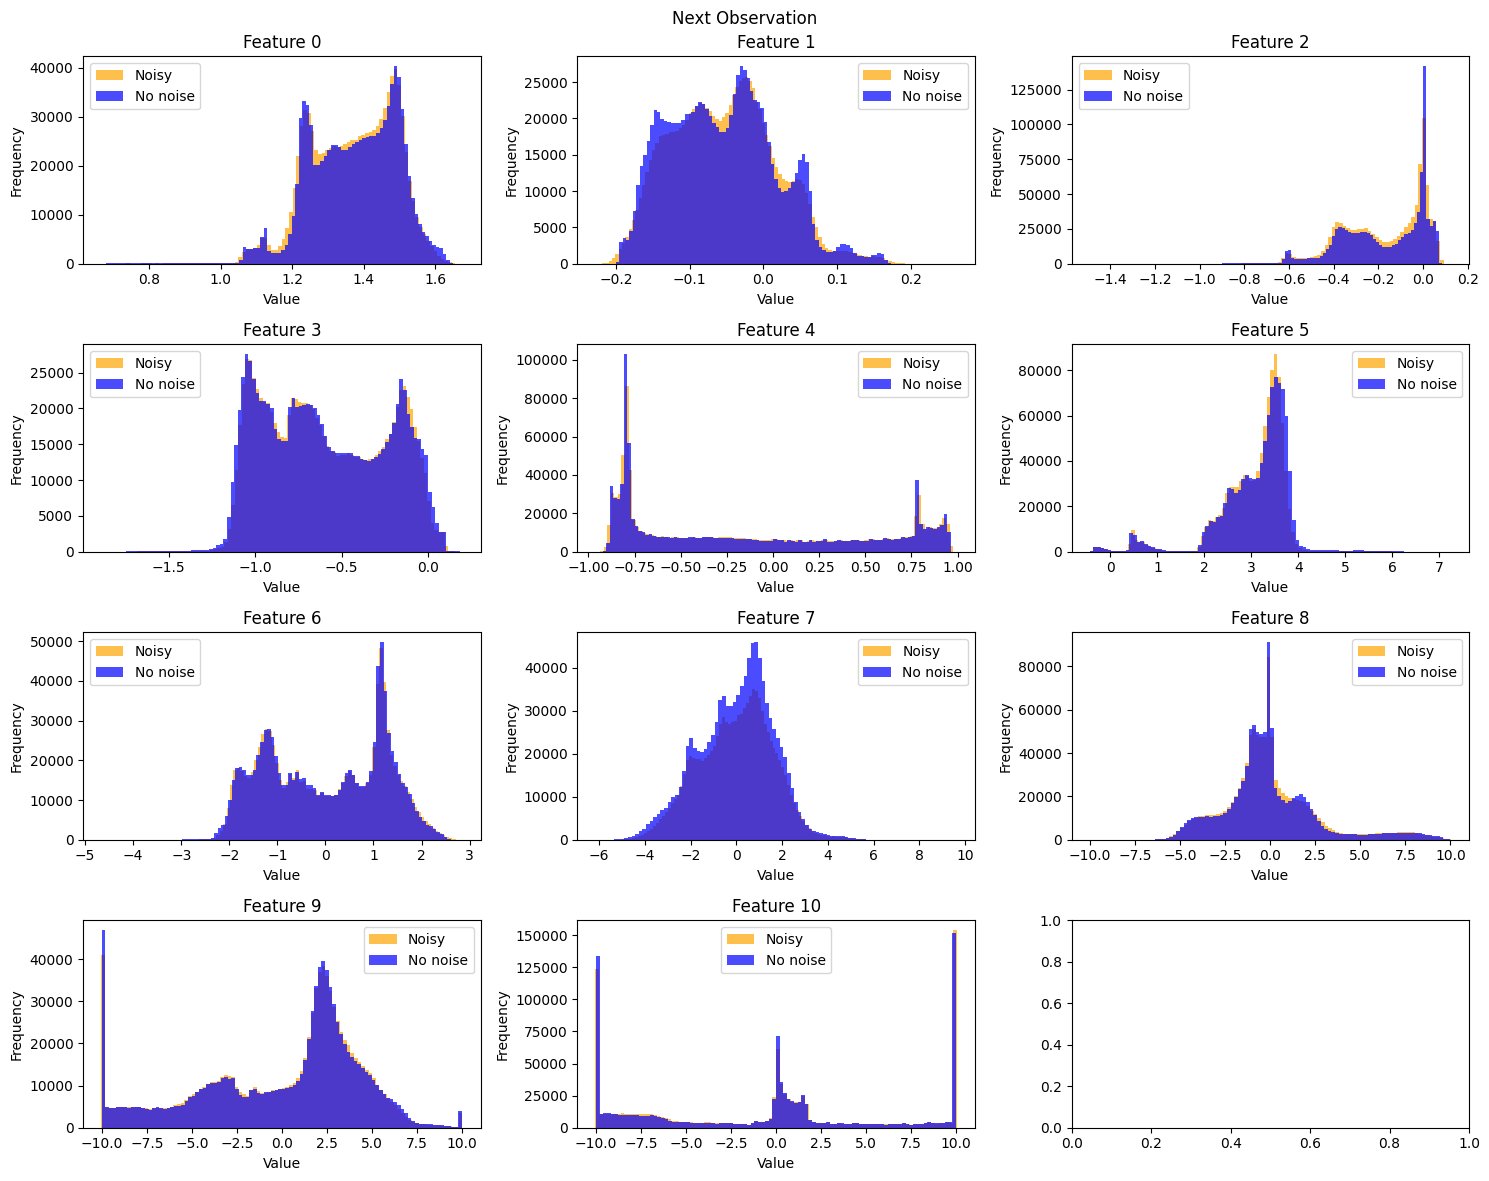

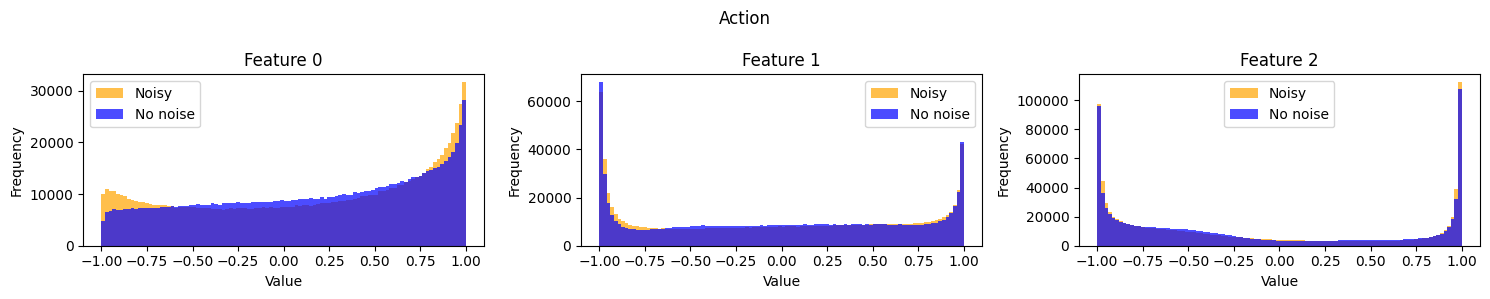

In [11]:
logdir ="/abiomed/intermediate_data_d4rl/farama_sac_expert/Hopper-v2_action_obs_noisy_0.01_1.0_0.01_1.0.pkl"
with open(logdir, 'rb') as f:
    noisy_1 = pickle.load(f)

plot_features( noisy_1['next_observations'], d4rl_expert['next_observations'],title = 'Next Observation', label1='Noisy', label2='No noise')
plot_features(noisy_1['actions'], d4rl_expert['actions'], title = 'Action', label1='Noisy', label2='No noise')

## transition noise

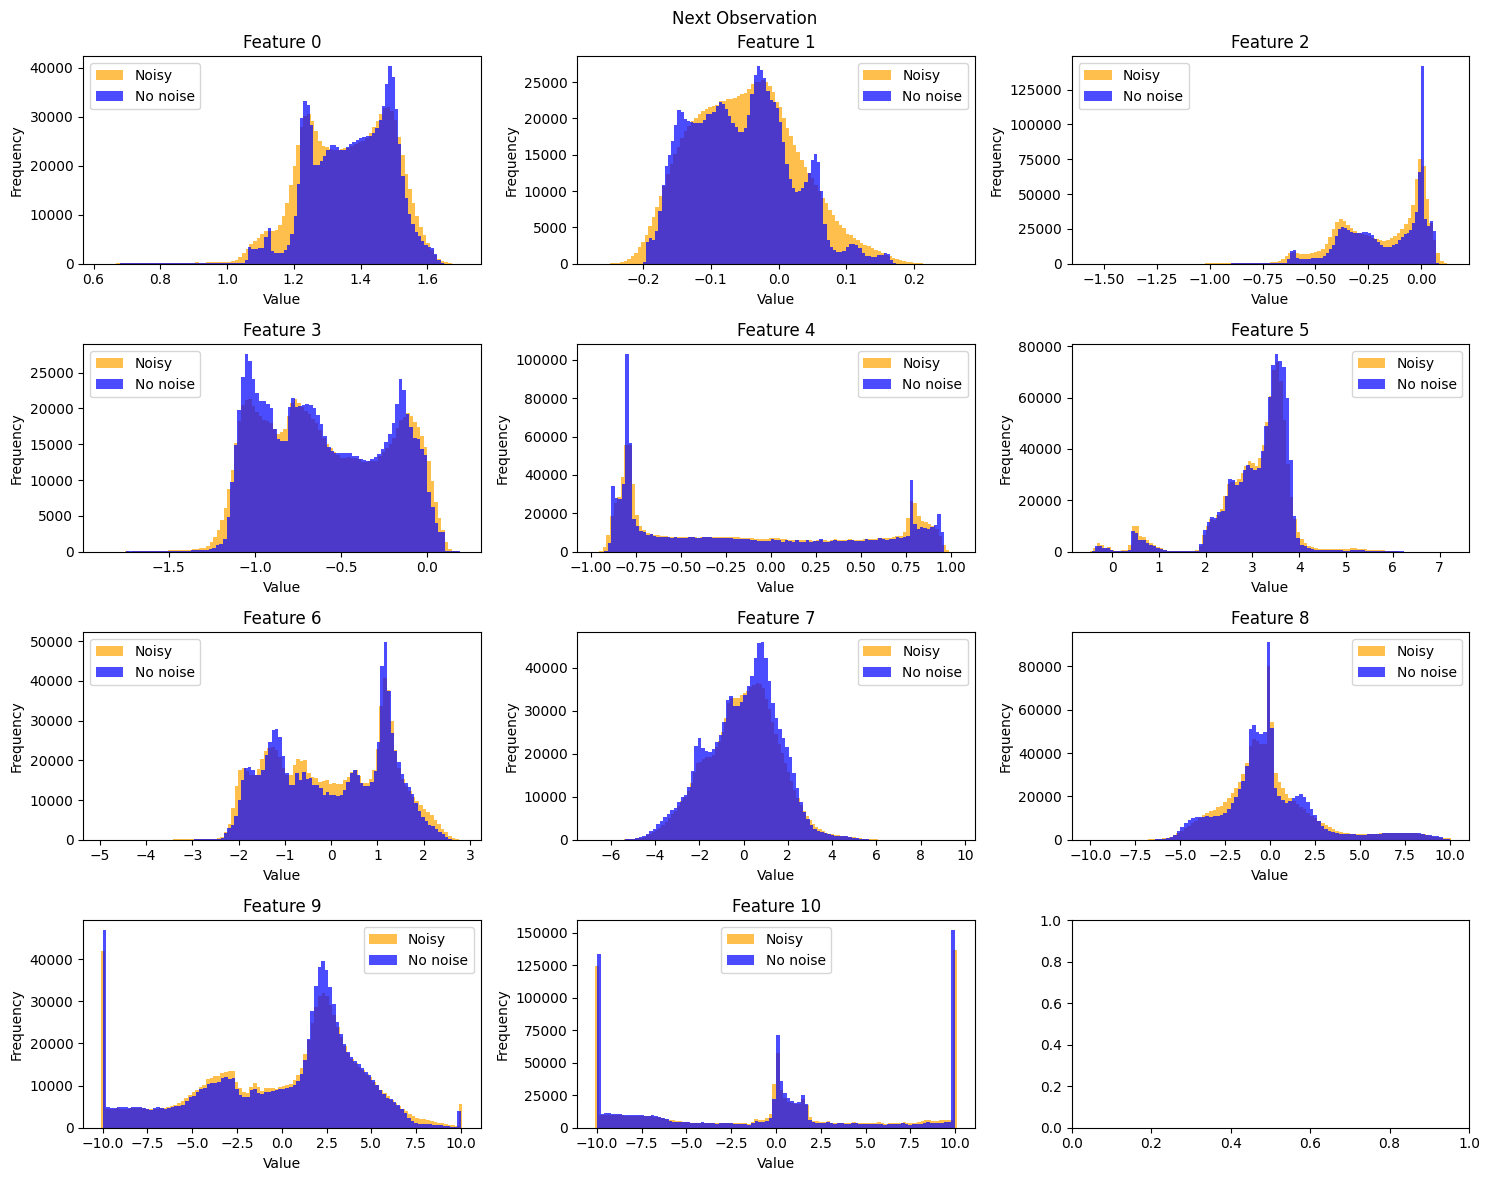

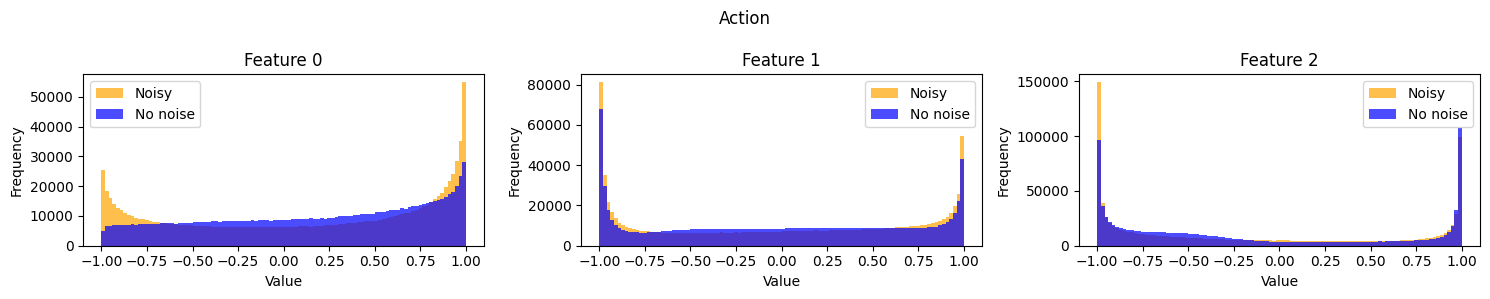

In [20]:
logdir ="/abiomed/intermediate_data_d4rl/farama_sac_expert/Hopper-v2_obs_noisy_0.02_1.0.pkl"
with open(logdir, 'rb') as f:
    noisy_2 = pickle.load(f)

plot_features(noisy_2['next_observations'], d4rl_expert['next_observations'],title = 'Next Observation', label1='Noisy', label2='No noise')
plot_features(noisy_2['actions'], d4rl_expert['actions'], title = 'Action', label1='Noisy', label2='No noise')

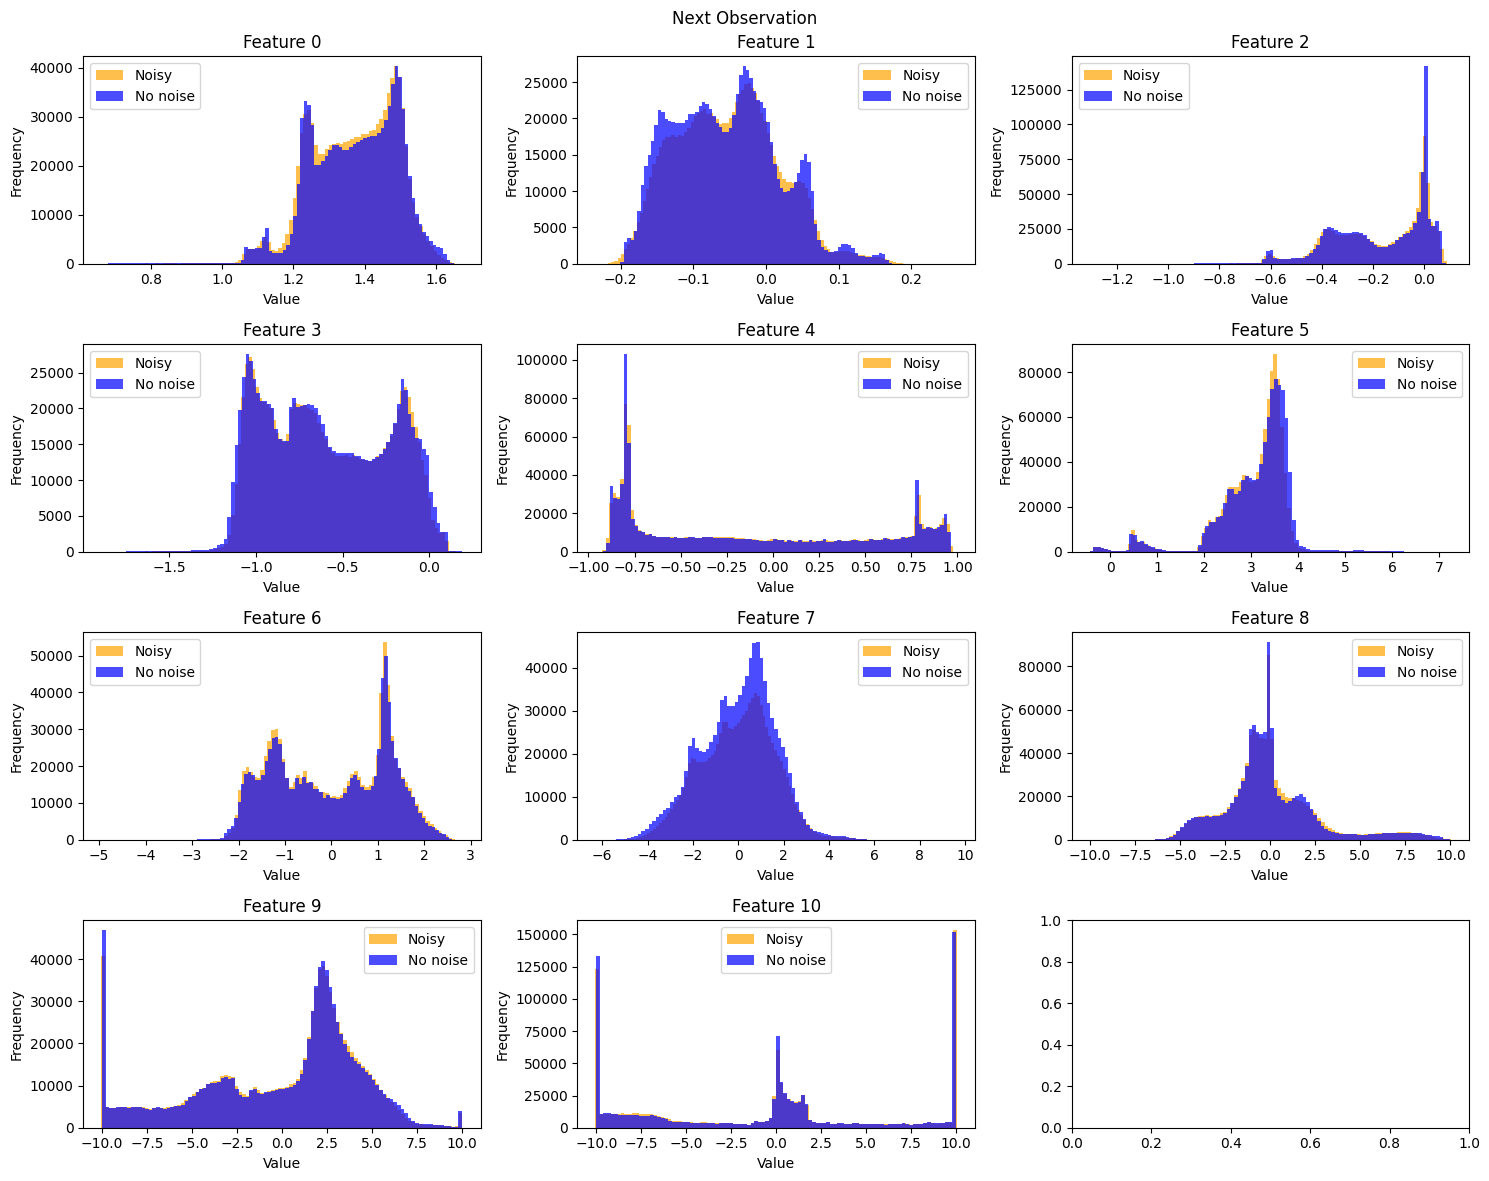

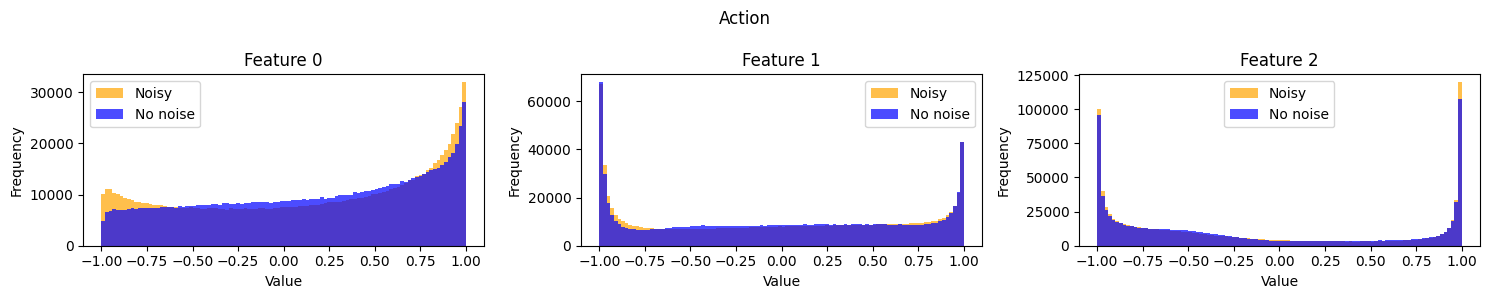

In [21]:
logdir ="/abiomed/intermediate_data_d4rl/farama_sac_expert/Hopper-v2_obs_noisy_0.01_1.0.pkl"
with open(logdir, 'rb') as f:
    noisy_2 = pickle.load(f)

plot_features(noisy_2['next_observations'], d4rl_expert['next_observations'],title = 'Next Observation', label1='Noisy', label2='No noise')
plot_features(noisy_2['actions'], d4rl_expert['actions'], title = 'Action', label1='Noisy', label2='No noise')

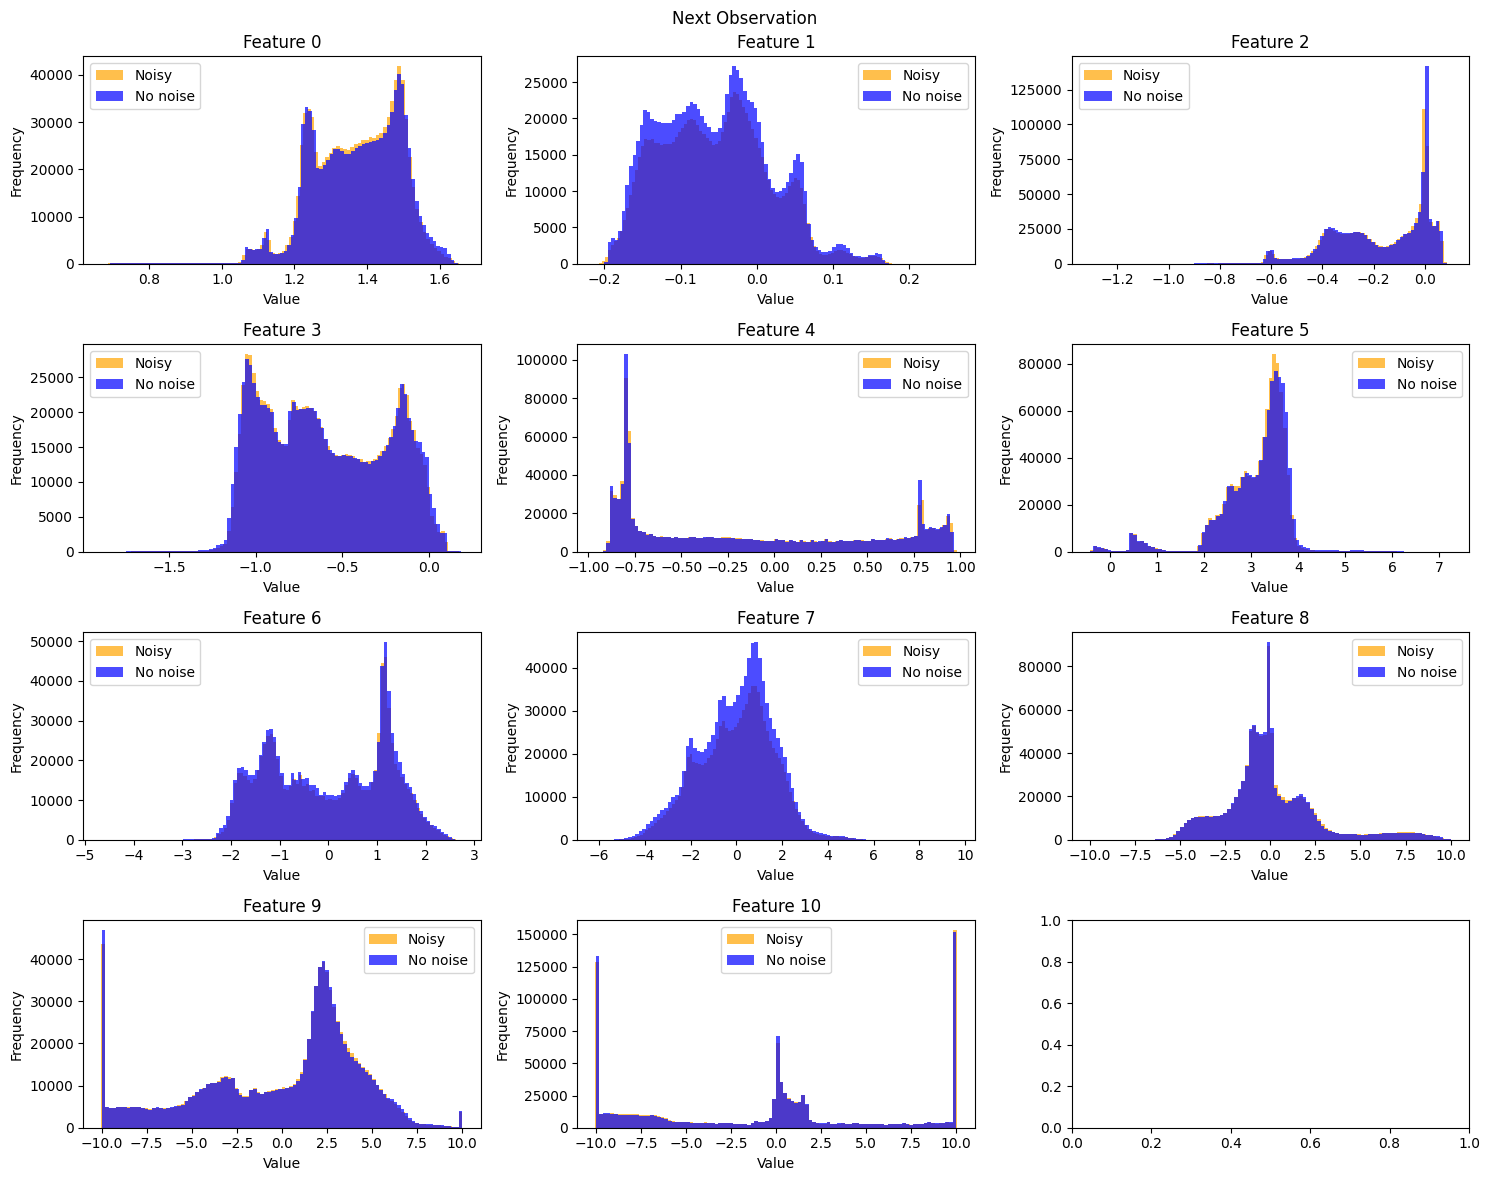

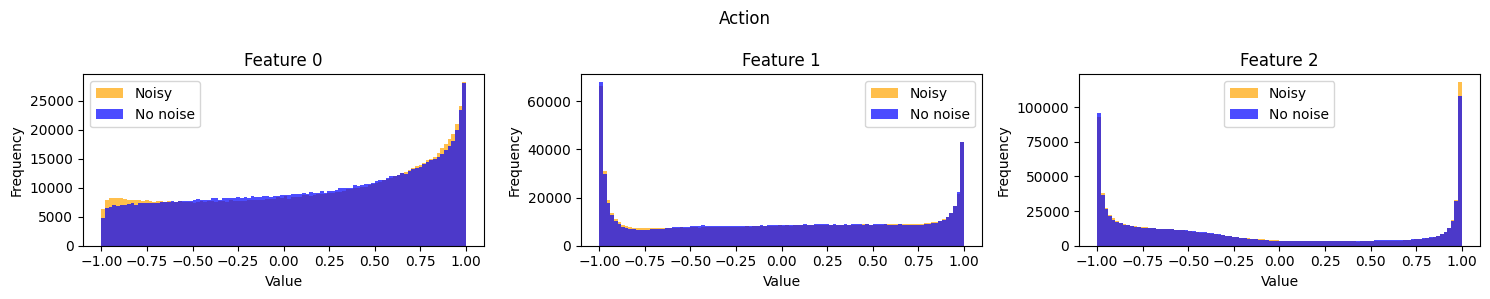

In [22]:
logdir ="/abiomed/intermediate_data_d4rl/farama_sac_expert/Hopper-v2_obs_noisy_0.005_1.0.pkl"
with open(logdir, 'rb') as f:
    noisy_2 = pickle.load(f)

plot_features(noisy_2['next_observations'], d4rl_expert['next_observations'],title = 'Next Observation', label1='Noisy', label2='No noise')
plot_features(noisy_2['actions'], d4rl_expert['actions'], title = 'Action', label1='Noisy', label2='No noise')

## action-transition noise different noise rate


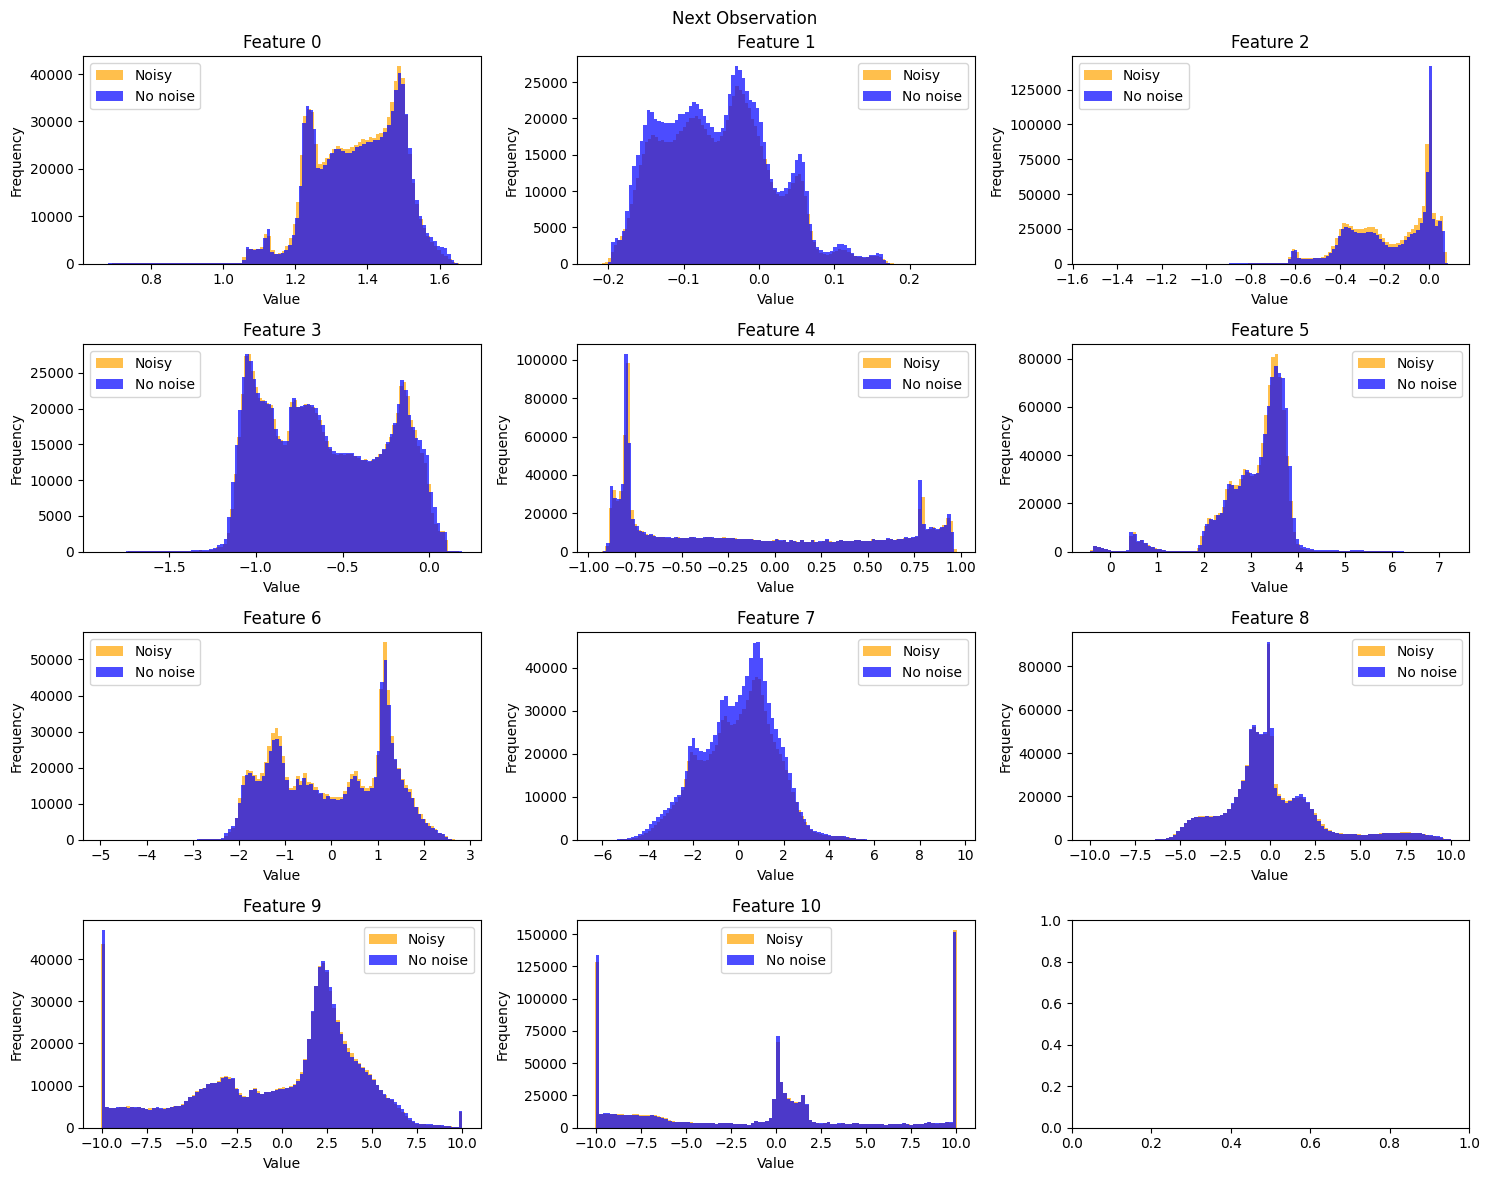

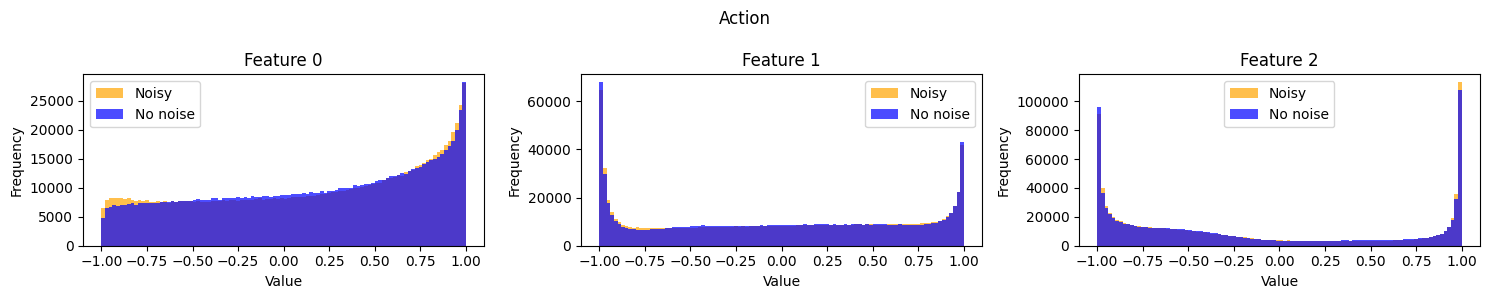

In [12]:
logdir="/abiomed/intermediate_data_d4rl/farama_sac_expert/Hopper-v2_action_obs_noisy_0.01_0.5_0.005_1.0.pkl"
with open(logdir, 'rb') as f:
    noisy_3 = pickle.load(f)

plot_features(noisy_3['next_observations'], d4rl_expert['next_observations'],title = 'Next Observation', label1='Noisy', label2='No noise')
plot_features(noisy_3['actions'], d4rl_expert['actions'], title = 'Action', label1='Noisy', label2='No noise')

## action noise

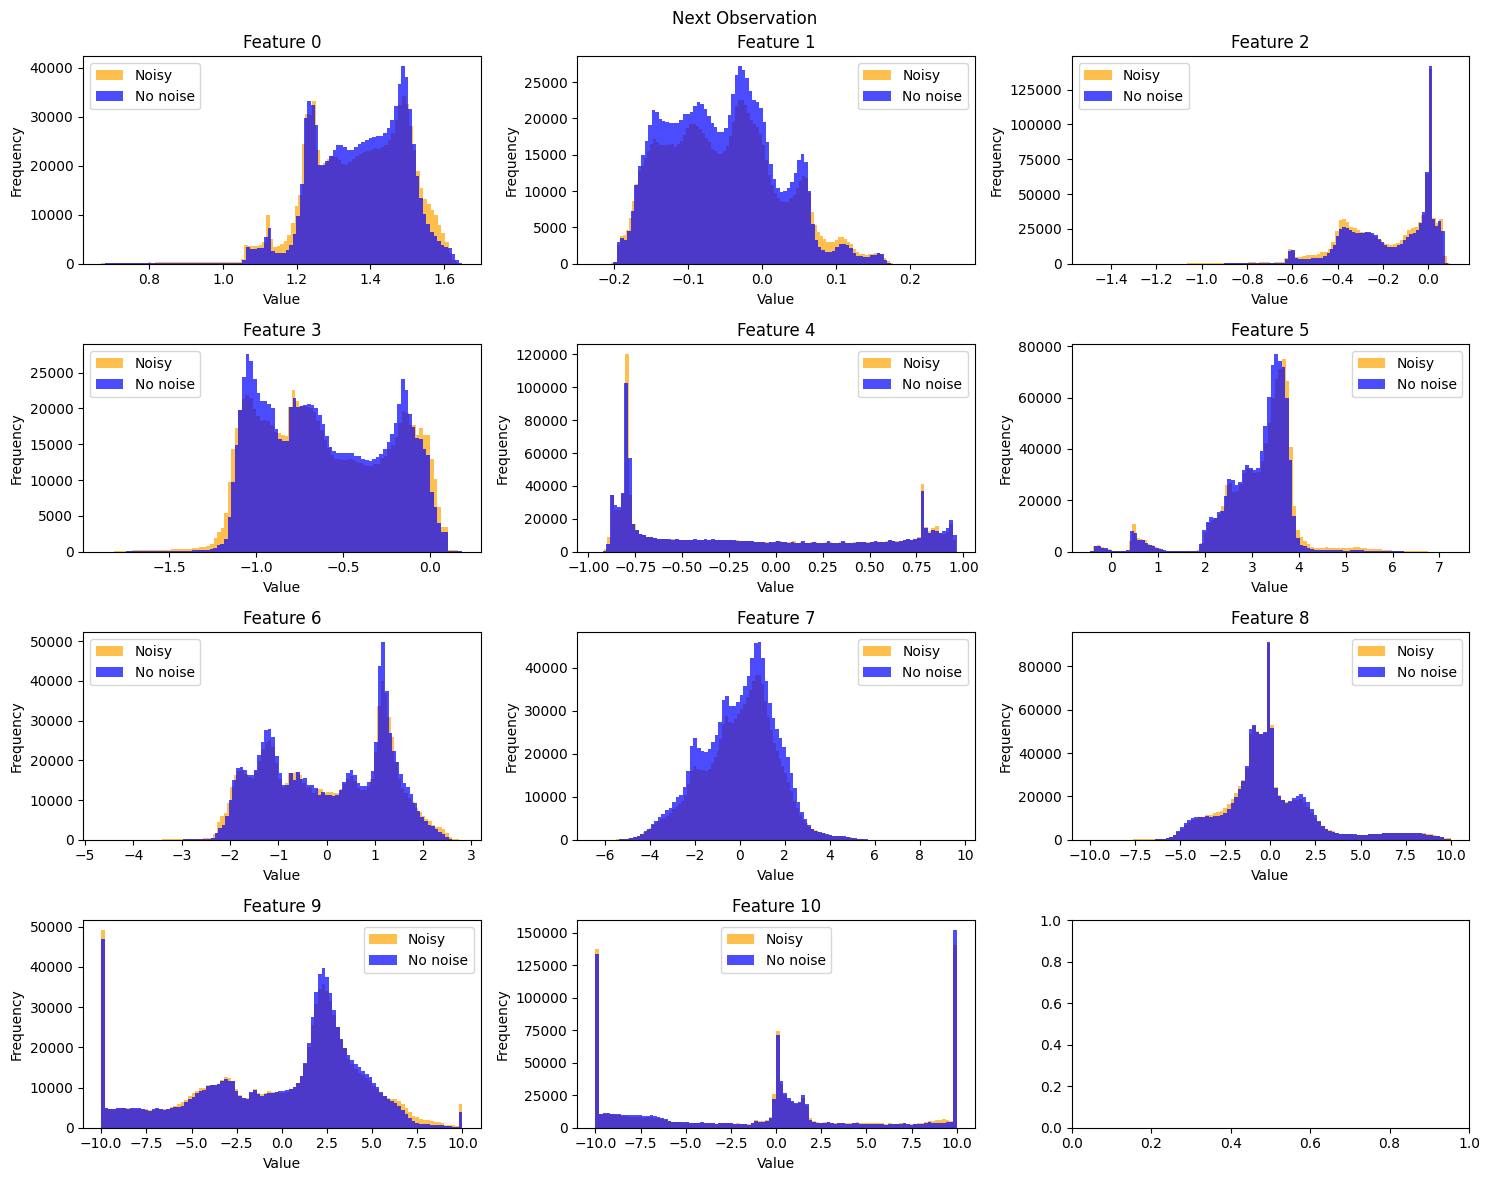

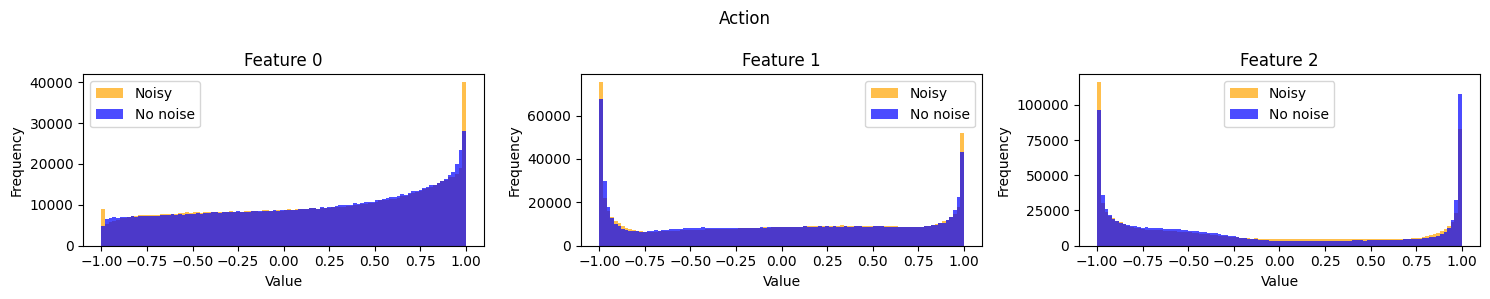

In [18]:
logdir = "/abiomed/intermediate_data_d4rl/farama_sac_expert/Hopper-v2_action_noisy_0.08_0.5.pkl"
with open(logdir, 'rb') as f:
    noisy_4 = pickle.load(f)

plot_features(noisy_4['next_observations'], d4rl_expert['next_observations'],title = 'Next Observation', label1='Noisy', label2='No noise')
plot_features(noisy_4['actions'], d4rl_expert['actions'], title = 'Action', label1='Noisy', label2='No noise')

**increased the noise rate**

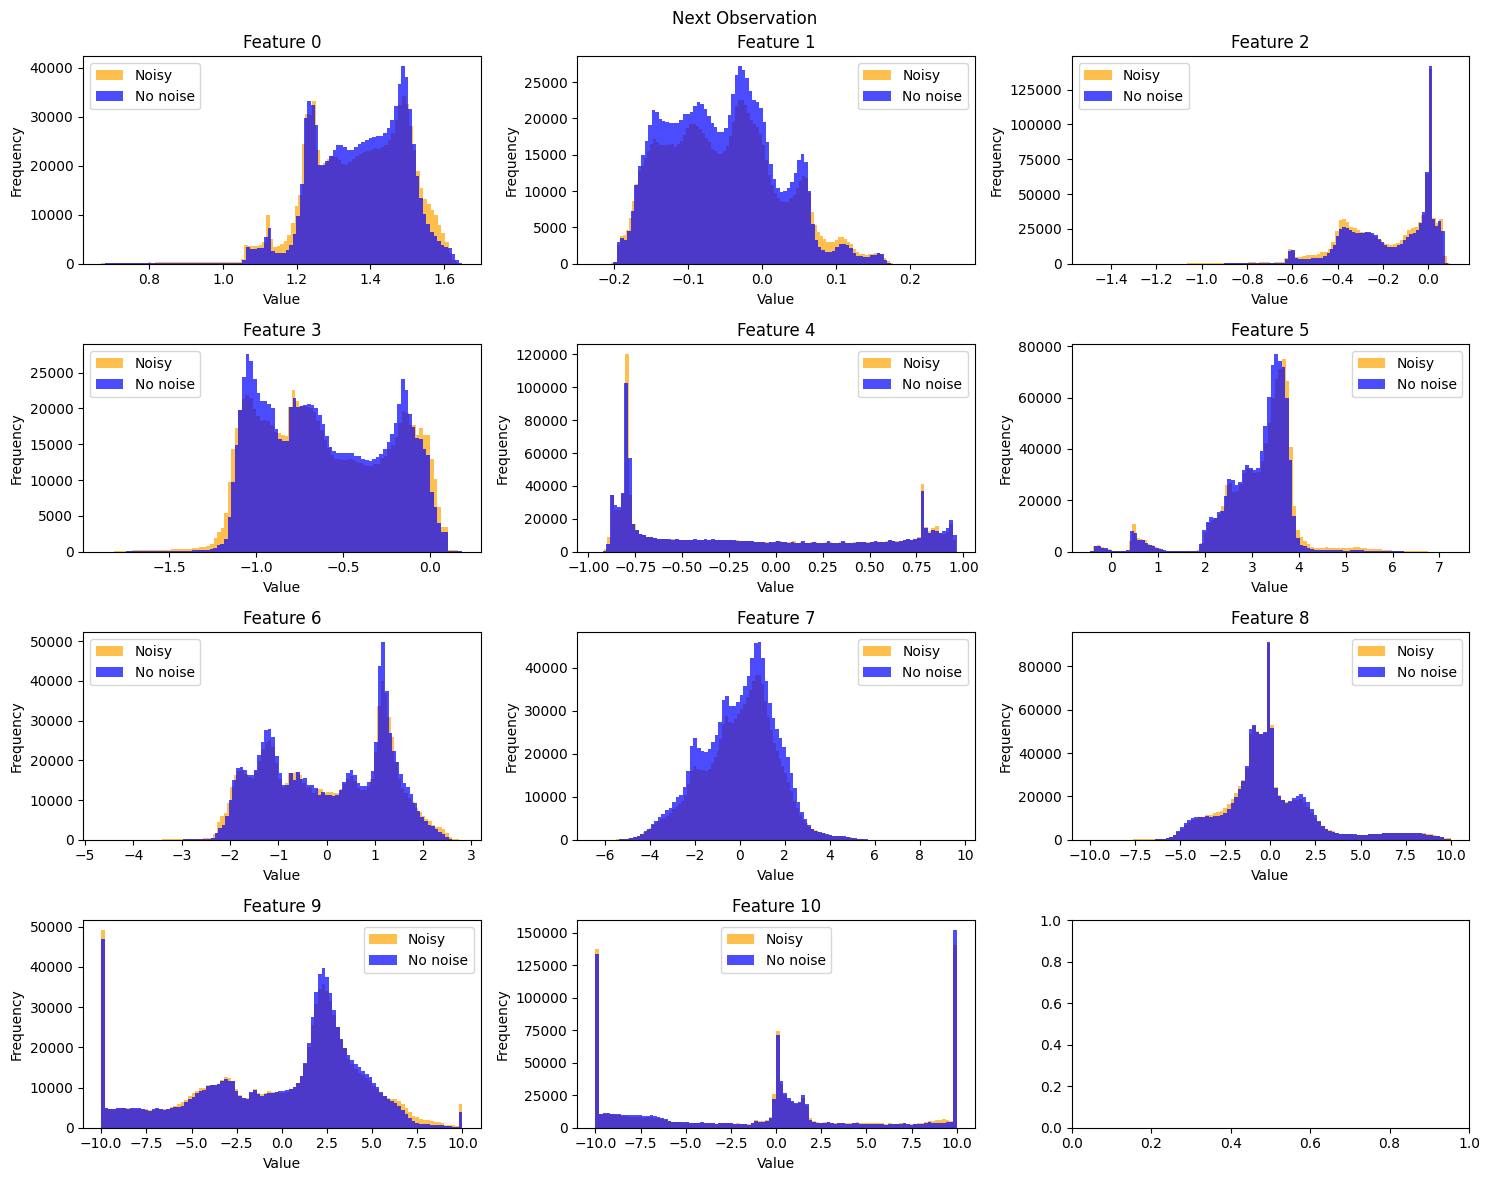

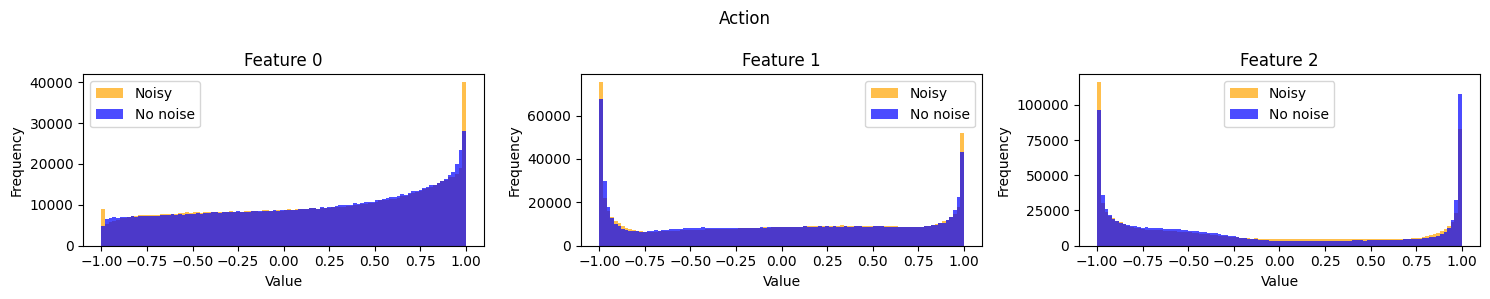

In [19]:
logdir = "/abiomed/intermediate_data_d4rl/farama_sac_expert/Hopper-v2_action_noisy_0.08_1.0.pkl"
with open(logdir, 'rb') as f:
    noisy_5 = pickle.load(f)

plot_features(noisy_4['next_observations'], d4rl_expert['next_observations'],title = 'Next Observation', label1='Noisy', label2='No noise')
plot_features(noisy_4['actions'], d4rl_expert['actions'], title = 'Action', label1='Noisy', label2='No noise')